# CPD using TIRE

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

In [2]:
# Load data
timeseries = np.loadtxt("./data/EEG.csv", delimiter=",")#pd.read_csv('data/MoCap/4d/amc_86_02.4d', sep=' ').to_numpy()
#data = StandardScaler().fit_transform(data)
data = timeseries

In [3]:
timeseries = data[0]

In [4]:
timeseries.shape

(259520,)

In [13]:
data.shape

(45, 170250)

In [5]:
labels = np.loadtxt("./data/EEG_labels.csv", delimiter=",")
ground_truth = np.where(labels[:-1] != labels[1:])[0]

In [91]:
windows = utils.ts_to_windows(timeseries, 0, window_size, stride=1)
windows = utils.minmaxscale(windows,-1,1)
#windows = utils.combine_ts(windows)
windows_TD = windows

In [92]:
windows_TD.shape

(376368, 50)

In [5]:
window_size = 200
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

In [6]:
change_points = []
disses = []
for i in range(len(data)):
    timeseries = data[i]
    windows = utils.ts_to_windows(timeseries, 0, window_size, stride=1)
    windows = utils.minmaxscale(windows,-1,1)
    windows_TD = windows
    windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
    shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
    shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)
    dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
    disses.append(dissimilarities)
    change_point_scores = TIRE.change_point_score(dissimilarities, window_size)
    change_points.append(change_point_scores)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 200)]     0           []                               
                                                                                                  
 dense (Dense)                  (None, 3, 1)         201         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 3, 0)         0           ['input_1[0][0]']                
                                                                                                  
 tf.concat (TFOpLambda)         (None, 3, 1)         0           ['dense[0][0]',                  
                                                                  'dense_1[0][0]']            

4052/4052 [==============================] - 3s 649us/step - loss: 0.0093
Epoch 170/200
4052/4052 [==============================] - 3s 641us/step - loss: 0.0093
Epoch 171/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0093
Epoch 172/200
4052/4052 [==============================] - 3s 651us/step - loss: 0.0093
Epoch 173/200
4052/4052 [==============================] - 3s 644us/step - loss: 0.0093
Epoch 174/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0093
Epoch 175/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0093
Epoch 176/200
4052/4052 [==============================] - 3s 653us/step - loss: 0.0093
Epoch 177/200
4052/4052 [==============================] - 3s 656us/step - loss: 0.0093
Epoch 178/200
4052/4052 [==============================] - 3s 642us/step - loss: 0.0093
Epoch 179/200
4052/4052 [==============================] - 3s 642us/step - loss: 0.0093
Epoch 180/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 621us/step - loss: 1.7608e-04
Epoch 38/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7590e-04
Epoch 39/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.7590e-04
Epoch 40/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7603e-04
Epoch 41/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.7599e-04
Epoch 42/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.7592e-04
Epoch 43/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.7592e-04
Epoch 44/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.7567e-04
Epoch 45/200
4052/4052 [==============================] - 2s 616us/step - loss: 1.7572e-04
Epoch 46/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.7554e-04
Epoch 47/200
4052/4052 [==============================] - 2s 613us/step - loss: 1.7548e-04
Epoch 48/200

                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0101
Epoch 2/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0097
Epoch 3/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0097
Epoch 4/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0097
Epoch 5/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0097
Epoch 6/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0097
Epoch 7/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0097
Epoch 8/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0097
Epoch 9/200
4052/4052 [===========================

4052/4052 [==============================] - 3s 681us/step - loss: 0.0097
Epoch 92/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0097
Epoch 93/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0097
Epoch 94/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0097
Epoch 95/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0097
Epoch 96/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0097
Epoch 97/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0097
Epoch 98/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0097
Epoch 99/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0097
Epoch 100/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0097
Epoch 101/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0097
Epoch 102/200
4052/4052 [=============================

4052/4052 [==============================] - 3s 639us/step - loss: 1.7961e-04
Epoch 52/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7993e-04
Epoch 53/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.7934e-04
Epoch 54/200
4052/4052 [==============================] - 2s 613us/step - loss: 1.7939e-04
Epoch 55/200
4052/4052 [==============================] - 2s 602us/step - loss: 1.7937e-04
Epoch 56/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.7925e-04
Epoch 57/200
4052/4052 [==============================] - 2s 613us/step - loss: 1.7919e-04
Epoch 58/200
4052/4052 [==============================] - 2s 608us/step - loss: 1.7899e-04
Epoch 59/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.7912e-04
Epoch 60/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.7891e-04
Epoch 61/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.7870e-04
Epoch 62/200

4052/4052 [==============================] - 3s 668us/step - loss: 0.0104
Epoch 12/200
4052/4052 [==============================] - 3s 658us/step - loss: 0.0104
Epoch 13/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0104
Epoch 14/200
4052/4052 [==============================] - 3s 655us/step - loss: 0.0104
Epoch 15/200
4052/4052 [==============================] - 3s 659us/step - loss: 0.0104
Epoch 16/200
4052/4052 [==============================] - 3s 659us/step - loss: 0.0104
Epoch 17/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0104
Epoch 18/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0104
Epoch 19/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0104
Epoch 20/200
4052/4052 [==============================] - 3s 655us/step - loss: 0.0104
Epoch 21/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0104
Epoch 22/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 652us/step - loss: 0.0104
Epoch 199/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0104
Epoch 200/200
8104/8104 [==============================] - 4s 442us/step
Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_19 (Dense)               (None, 3, 10)        170         ['input_11[0][0]']               
                                                                                                  
 dense_20 (Dense)               (None, 3, 1)         11          ['dense_19[0][0]']               
                                                      

4052/4052 [==============================] - 3s 656us/step - loss: 1.8441e-04
Epoch 155/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.8447e-04
Epoch 156/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.8442e-04
Epoch 157/200
4052/4052 [==============================] - 3s 657us/step - loss: 1.8432e-04
Epoch 158/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.8440e-04
Epoch 159/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.8438e-04
Epoch 160/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8437e-04
Epoch 161/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8433e-04
Epoch 162/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8522e-04
Epoch 163/200
4052/4052 [==============================] - 3s 647us/step - loss: 1.8592e-04
Epoch 164/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.8572e-04
Ep

4052/4052 [==============================] - 3s 721us/step - loss: 0.0111
Epoch 120/200
4052/4052 [==============================] - 3s 712us/step - loss: 0.0111
Epoch 121/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0111
Epoch 122/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0111
Epoch 123/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0111
Epoch 124/200
4052/4052 [==============================] - 3s 711us/step - loss: 0.0111
Epoch 125/200
4052/4052 [==============================] - 3s 722us/step - loss: 0.0111
Epoch 126/200
4052/4052 [==============================] - 3s 732us/step - loss: 0.0111
Epoch 127/200
4052/4052 [==============================] - 3s 733us/step - loss: 0.0111
Epoch 128/200
4052/4052 [==============================] - 3s 721us/step - loss: 0.0111
Epoch 129/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0111
Epoch 130/200
4052/4052 [=====================

                                                                                                  
 tf.concat_7 (TFOpLambda)       (None, 3, 1)         0           ['dense_28[0][0]',               
                                                                  'dense_29[0][0]']               
                                                                                                  
 dense_30 (Dense)               (None, 3, 10)        20          ['tf.concat_7[0][0]']            
                                                                                                  
 dense_31 (Dense)               (None, 3, 16)        176         ['dense_30[0][0]']               
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [======================

4052/4052 [==============================] - 3s 626us/step - loss: 1.8943e-04
Epoch 169/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.8923e-04
Epoch 170/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.8913e-04
Epoch 171/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.8892e-04
Epoch 172/200
4052/4052 [==============================] - 3s 647us/step - loss: 1.8899e-04
Epoch 173/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.8890e-04
Epoch 174/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.8904e-04
Epoch 175/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.8879e-04
Epoch 176/200
4052/4052 [==============================] - 2s 617us/step - loss: 1.8876e-04
Epoch 177/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8886e-04
Epoch 178/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.8890e-04
Ep

Epoch 134/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0100
Epoch 135/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0100
Epoch 136/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0100
Epoch 137/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0100
Epoch 138/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0100
Epoch 139/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0100
Epoch 140/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0100
Epoch 141/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0100
Epoch 142/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0100
Epoch 143/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0100
Epoch 144/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0100
Epoch 145/200
4052/4052 [=======

4052/4052 [==============================] - 3s 619us/step - loss: 3.0505e-04
Epoch 4/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.0123e-04
Epoch 5/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.8727e-04
Epoch 6/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.8134e-04
Epoch 7/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7830e-04
Epoch 8/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.7641e-04
Epoch 9/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.7530e-04
Epoch 10/200
4052/4052 [==============================] - 2s 612us/step - loss: 1.7444e-04
Epoch 11/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.7387e-04
Epoch 12/200
4052/4052 [==============================] - 2s 617us/step - loss: 1.7335e-04
Epoch 13/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.7304e-04
Epoch 14/200
4052/

4052/4052 [==============================] - 3s 633us/step - loss: 1.6878e-04
Epoch 183/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.6873e-04
Epoch 184/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.6876e-04
Epoch 185/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6873e-04
Epoch 186/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.6873e-04
Epoch 187/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.6875e-04
Epoch 188/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6876e-04
Epoch 189/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6866e-04
Epoch 190/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.6876e-04
Epoch 191/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.6860e-04
Epoch 192/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6859e-04
Ep

4052/4052 [==============================] - 3s 694us/step - loss: 0.0089
Epoch 149/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0089
Epoch 150/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0089
Epoch 151/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0089
Epoch 152/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0089
Epoch 153/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0089
Epoch 154/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0089
Epoch 155/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0089
Epoch 156/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0089
Epoch 157/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0089
Epoch 158/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0089
Epoch 159/200
4052/4052 [=====================

4052/4052 [==============================] - 2s 607us/step - loss: 1.6103e-04
Epoch 107/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.6092e-04
Epoch 108/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.6081e-04
Epoch 109/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.6089e-04
Epoch 110/200
4052/4052 [==============================] - 3s 618us/step - loss: 1.6098e-04
Epoch 111/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6098e-04
Epoch 112/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.6094e-04
Epoch 113/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.6103e-04
Epoch 114/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.6090e-04
Epoch 115/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6105e-04
Epoch 116/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.6092e-04
Ep

4052/4052 [==============================] - 3s 672us/step - loss: 0.0067
Epoch 70/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0067
Epoch 71/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0067
Epoch 72/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0067
Epoch 73/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0067
Epoch 74/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0067
Epoch 75/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0067
Epoch 76/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0067
Epoch 77/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0067
Epoch 78/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0067
Epoch 79/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0067
Epoch 80/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 624us/step - loss: 1.0994e-04
Epoch 31/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0978e-04
Epoch 32/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0965e-04
Epoch 33/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.0965e-04
Epoch 34/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.0945e-04
Epoch 35/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.0937e-04
Epoch 36/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.0938e-04
Epoch 37/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.0931e-04
Epoch 38/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0920e-04
Epoch 39/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0918e-04
Epoch 40/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.0903e-04
Epoch 41/200

Epoch 120/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.0716e-04
Epoch 121/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.0720e-04
Epoch 122/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0723e-04
Epoch 123/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.0720e-04
Epoch 124/200
4052/4052 [==============================] - 2s 617us/step - loss: 1.0719e-04
Epoch 125/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.0717e-04
Epoch 126/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0715e-04
Epoch 127/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0710e-04
Epoch 128/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.0718e-04
Epoch 129/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.0706e-04
Epoch 130/200
4052/4052 [==============================] - 3s 623us/step - loss:

 dense_57 (Dense)               (None, 3, 0)         0           ['input_29[0][0]']               
                                                                                                  
 tf.concat_14 (TFOpLambda)      (None, 3, 1)         0           ['dense_56[0][0]',               
                                                                  'dense_57[0][0]']               
                                                                                                  
 dense_58 (Dense)               (None, 3, 200)       400         ['tf.concat_14[0][0]']           
                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0091
Epoch 2/200
4052/4052 [==============================] - 3

4052/4052 [==============================] - 3s 691us/step - loss: 0.0086
Epoch 178/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0086
Epoch 179/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0086
Epoch 180/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0086
Epoch 181/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0086
Epoch 182/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0086
Epoch 183/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0086
Epoch 184/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0086
Epoch 185/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0086
Epoch 186/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0086
Epoch 187/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0086
Epoch 188/200
4052/4052 [=====================

4052/4052 [==============================] - 2s 607us/step - loss: 1.5630e-04
Epoch 134/200
4052/4052 [==============================] - 2s 608us/step - loss: 1.5631e-04
Epoch 135/200
4052/4052 [==============================] - 2s 604us/step - loss: 1.5640e-04
Epoch 136/200
4052/4052 [==============================] - 2s 608us/step - loss: 1.5642e-04
Epoch 137/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5630e-04
Epoch 138/200
4052/4052 [==============================] - 2s 605us/step - loss: 1.5630e-04
Epoch 139/200
4052/4052 [==============================] - 2s 605us/step - loss: 1.5625e-04
Epoch 140/200
4052/4052 [==============================] - 2s 604us/step - loss: 1.5631e-04
Epoch 141/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5629e-04
Epoch 142/200
4052/4052 [==============================] - 2s 607us/step - loss: 1.5621e-04
Epoch 143/200
4052/4052 [==============================] - 2s 606us/step - loss: 1.5615e-04
Ep

4052/4052 [==============================] - 3s 673us/step - loss: 0.0093
Epoch 98/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0093
Epoch 99/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0093
Epoch 100/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0093
Epoch 101/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0093
Epoch 102/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0093
Epoch 103/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0093
Epoch 104/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0093
Epoch 105/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0093
Epoch 106/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0093
Epoch 107/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0093
Epoch 108/200
4052/4052 [=======================

4052/4052 [==============================] - 3s 629us/step - loss: 1.7056e-04
Epoch 58/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7084e-04
Epoch 59/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.7068e-04
Epoch 60/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7078e-04
Epoch 61/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7065e-04
Epoch 62/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7068e-04
Epoch 63/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7054e-04
Epoch 64/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.7074e-04
Epoch 65/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7067e-04
Epoch 66/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7062e-04
Epoch 67/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.7066e-04
Epoch 68/200

4052/4052 [==============================] - 3s 683us/step - loss: 0.0095
Epoch 18/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0095
Epoch 19/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0095
Epoch 20/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0095
Epoch 21/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0095
Epoch 22/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0095
Epoch 23/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0095
Epoch 24/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0095
Epoch 25/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0095
Epoch 26/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0095
Epoch 27/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0095
Epoch 28/200
4052/4052 [==============================] 

 input_39 (InputLayer)          [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_75 (Dense)               (None, 3, 10)        170         ['input_39[0][0]']               
                                                                                                  
 dense_76 (Dense)               (None, 3, 1)         11          ['dense_75[0][0]']               
                                                                                                  
 dense_77 (Dense)               (None, 3, 0)         0           ['dense_75[0][0]']               
                                                                                                  
 tf.concat_19 (TFOpLambda)      (None, 3, 1)         0           ['dense_76[0][0]',               
                                                                  'dense_77[0][0]']               
          

4052/4052 [==============================] - 3s 621us/step - loss: 1.6639e-04
Epoch 73/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.6630e-04
Epoch 74/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.6629e-04
Epoch 75/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.6628e-04
Epoch 76/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.6628e-04
Epoch 77/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.6621e-04
Epoch 78/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.6622e-04
Epoch 79/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.6619e-04
Epoch 80/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6619e-04
Epoch 81/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6609e-04
Epoch 82/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.6612e-04
Epoch 83/200

4052/4052 [==============================] - 3s 690us/step - loss: 0.0104
Epoch 34/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0104
Epoch 35/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0104
Epoch 36/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0104
Epoch 37/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0104
Epoch 38/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0104
Epoch 39/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0104
Epoch 40/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0104
Epoch 41/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0104
Epoch 42/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0104
Epoch 43/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0104
Epoch 44/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 684us/step - loss: 0.0104
Epoch 128/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0104
Epoch 129/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0104
Epoch 130/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0104
Epoch 131/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0104
Epoch 132/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0104
Epoch 133/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0104
Epoch 134/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0104
Epoch 135/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0104
Epoch 136/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0104
Epoch 137/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0104
Epoch 138/200
4052/4052 [=====================

                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 616us/step - loss: 0.0399
Epoch 2/200
4052/4052 [==============================] - 2s 610us/step - loss: 0.0012
Epoch 3/200
4052/4052 [==============================] - 2s 616us/step - loss: 4.8946e-04
Epoch 4/200
4052/4052 [==============================] - 2s 611us/step - loss: 2.4000e-04
Epoch 5/200
4052/4052 [==============================] - 2s 605us/step - loss: 2.2682e-04
Epoch 6/200
4052/4052 [==============================] - 2s 608us/step - loss: 2.2112e-04
Epoch 7/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.1724e-04
Epoch 8/200
4052/4052 [==============================] - 2s 614us/step - loss: 2.1459e-04
Epoch 9/200
4052/4052 [===

4052/4052 [==============================] - 2s 610us/step - loss: 1.9261e-04
Epoch 177/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.9321e-04
Epoch 178/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.9280e-04
Epoch 179/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.9292e-04
Epoch 180/200
4052/4052 [==============================] - 2s 616us/step - loss: 1.9253e-04
Epoch 181/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.9269e-04
Epoch 182/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.9244e-04
Epoch 183/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.9273e-04
Epoch 184/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.9266e-04
Epoch 185/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.9274e-04
Epoch 186/200
4052/4052 [==============================] - 2s 616us/step - loss: 1.9308e-04
Ep

4052/4052 [==============================] - 3s 694us/step - loss: 0.0099
Epoch 143/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0099
Epoch 144/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0099
Epoch 145/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0099
Epoch 146/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0099
Epoch 147/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0099
Epoch 148/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0099
Epoch 149/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0099
Epoch 150/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0099
Epoch 151/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0099
Epoch 152/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0099
Epoch 153/200
4052/4052 [=====================

4052/4052 [==============================] - 2s 612us/step - loss: 1.5958e-04
Epoch 12/200
4052/4052 [==============================] - 2s 608us/step - loss: 1.5919e-04
Epoch 13/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.5883e-04
Epoch 14/200
4052/4052 [==============================] - 2s 612us/step - loss: 1.5861e-04
Epoch 15/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.5833e-04
Epoch 16/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.5812e-04
Epoch 17/200
4052/4052 [==============================] - 2s 612us/step - loss: 1.5799e-04
Epoch 18/200
4052/4052 [==============================] - 2s 606us/step - loss: 1.5791e-04
Epoch 19/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.5773e-04
Epoch 20/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5756e-04
Epoch 21/200
4052/4052 [==============================] - 2s 607us/step - loss: 1.5753e-04
Epoch 22/200

4052/4052 [==============================] - 2s 609us/step - loss: 1.5583e-04
Epoch 191/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.5579e-04
Epoch 192/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.5579e-04
Epoch 193/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.5572e-04
Epoch 194/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5577e-04
Epoch 195/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.5573e-04
Epoch 196/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5581e-04
Epoch 197/200
4052/4052 [==============================] - 2s 613us/step - loss: 1.5576e-04
Epoch 198/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.5575e-04
Epoch 199/200
4052/4052 [==============================] - 2s 612us/step - loss: 1.5579e-04
Epoch 200/200
8104/8104 [==============================] - 4s 446us/step
Model: "model_72"
___

Epoch 64/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0077
Epoch 65/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0077
Epoch 66/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0077
Epoch 67/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0077
Epoch 68/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0077
Epoch 69/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0077
Epoch 70/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0077
Epoch 71/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0077
Epoch 72/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0077
Epoch 73/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0077
Epoch 74/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0077
Epoch 75/200
4052/4052 [===================

4052/4052 [==============================] - 3s 635us/step - loss: 1.2894e-04
Epoch 26/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.2884e-04
Epoch 27/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.2878e-04
Epoch 28/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.2865e-04
Epoch 29/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.2856e-04
Epoch 30/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.2856e-04
Epoch 31/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.2848e-04
Epoch 32/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.2844e-04
Epoch 33/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.2836e-04
Epoch 34/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.2825e-04
Epoch 35/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.2827e-04
Epoch 36/200

4052/4052 [==============================] - 3s 632us/step - loss: 1.2734e-04
Epoch 116/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.2737e-04
Epoch 117/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.2737e-04
Epoch 118/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.2732e-04
Epoch 119/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.2732e-04
Epoch 120/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.2734e-04
Epoch 121/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.2739e-04
Epoch 122/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.2738e-04
Epoch 123/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.2730e-04
Epoch 124/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.2732e-04
Epoch 125/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.2734e-04
Ep

 input_53 (InputLayer)          [(None, 3, 200)]     0           []                               
                                                                                                  
 dense_104 (Dense)              (None, 3, 1)         201         ['input_53[0][0]']               
                                                                                                  
 dense_105 (Dense)              (None, 3, 0)         0           ['input_53[0][0]']               
                                                                                                  
 tf.concat_26 (TFOpLambda)      (None, 3, 1)         0           ['dense_104[0][0]',              
                                                                  'dense_105[0][0]']              
                                                                                                  
 dense_106 (Dense)              (None, 3, 200)       400         ['tf.concat_26[0][0]']           
          

4052/4052 [==============================] - 3s 679us/step - loss: 0.0056
Epoch 173/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0056
Epoch 174/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0056
Epoch 175/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0056
Epoch 176/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0056
Epoch 177/200
4052/4052 [==============================] - 3s 726us/step - loss: 0.0056
Epoch 178/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0056
Epoch 179/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0056
Epoch 180/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0056
Epoch 181/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0056
Epoch 182/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0056
Epoch 183/200
4052/4052 [=====================

Epoch 40/200
4052/4052 [==============================] - 3s 652us/step - loss: 9.5554e-05
Epoch 41/200
4052/4052 [==============================] - 3s 652us/step - loss: 9.5625e-05
Epoch 42/200
4052/4052 [==============================] - 3s 648us/step - loss: 9.5498e-05
Epoch 43/200
4052/4052 [==============================] - 3s 652us/step - loss: 9.5532e-05
Epoch 44/200
4052/4052 [==============================] - 3s 661us/step - loss: 9.5414e-05
Epoch 45/200
4052/4052 [==============================] - 3s 664us/step - loss: 9.5465e-05
Epoch 46/200
4052/4052 [==============================] - 3s 650us/step - loss: 9.5340e-05
Epoch 47/200
4052/4052 [==============================] - 3s 660us/step - loss: 9.5355e-05
Epoch 48/200
4052/4052 [==============================] - 3s 666us/step - loss: 9.5334e-05
Epoch 49/200
4052/4052 [==============================] - 3s 693us/step - loss: 9.5258e-05
Epoch 50/200
4052/4052 [==============================] - 3s 655us/step - loss: 9.5356e-05

Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0087
Epoch 2/200
4052/4052 [==============================] - 3s 718us/step - loss: 0.0083
Epoch 3/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0083
Epoch 4/200
4052/4052 [==============================] - 3s 710us/step - loss: 0.0083
Epoch 5/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0083
Epoch 6/200
4052/4052 [==============================] - 3s 710us/step - loss: 0.0083
Epoch 7/200
4052/4052 [==============================] - 3s 726us/step - loss: 0.0083
Epoch 8/200
4052/4052 [==============================] - 3s 715us/step - loss: 0.0083
Epoch 9/200
4052/4052 [==============================] - 3s 748us/step - loss: 0.0083
Epoch 10/200
4052/4052 [==============================] - 3s 728us/step - loss: 0.0083
Epoch 11/200
405

4052/4052 [==============================] - 3s 702us/step - loss: 0.0083
Epoch 187/200
4052/4052 [==============================] - 3s 707us/step - loss: 0.0083
Epoch 188/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0083
Epoch 189/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0083
Epoch 190/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0083
Epoch 191/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0083
Epoch 192/200
4052/4052 [==============================] - 3s 706us/step - loss: 0.0083
Epoch 193/200
4052/4052 [==============================] - 3s 717us/step - loss: 0.0083
Epoch 194/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0083
Epoch 195/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0083
Epoch 196/200
4052/4052 [==============================] - 3s 711us/step - loss: 0.0083
Epoch 197/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 650us/step - loss: 1.5915e-04
Epoch 143/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.5917e-04
Epoch 144/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.5917e-04
Epoch 145/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.5911e-04
Epoch 146/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.5908e-04
Epoch 147/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.5905e-04
Epoch 148/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.5900e-04
Epoch 149/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.5901e-04
Epoch 150/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.5903e-04
Epoch 151/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.5899e-04
Epoch 152/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.5899e-04
Ep

4052/4052 [==============================] - 3s 710us/step - loss: 0.0087
Epoch 108/200
4052/4052 [==============================] - 3s 707us/step - loss: 0.0087
Epoch 109/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0087
Epoch 110/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0087
Epoch 111/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0087
Epoch 112/200
4052/4052 [==============================] - 3s 706us/step - loss: 0.0087
Epoch 113/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0087
Epoch 114/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0087
Epoch 115/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0087
Epoch 116/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0087
Epoch 117/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0087
Epoch 118/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 639us/step - loss: 1.6651e-04
Epoch 68/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.6639e-04
Epoch 69/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.6643e-04
Epoch 70/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.6646e-04
Epoch 71/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.6642e-04
Epoch 72/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.6592e-04
Epoch 73/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.6487e-04
Epoch 74/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6468e-04
Epoch 75/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.6448e-04
Epoch 76/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.6429e-04
Epoch 77/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.6414e-04
Epoch 78/200

4052/4052 [==============================] - 3s 699us/step - loss: 0.0094
Epoch 29/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0094
Epoch 30/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0094
Epoch 31/200
4052/4052 [==============================] - 3s 706us/step - loss: 0.0094
Epoch 32/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0094
Epoch 33/200
4052/4052 [==============================] - 3s 710us/step - loss: 0.0094
Epoch 34/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0094
Epoch 35/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0094
Epoch 36/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0094
Epoch 37/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0094
Epoch 38/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0094
Epoch 39/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 703us/step - loss: 0.0094
Epoch 123/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0094
Epoch 124/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0094
Epoch 125/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0094
Epoch 126/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0094
Epoch 127/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0094
Epoch 128/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0094
Epoch 129/200
4052/4052 [==============================] - 3s 710us/step - loss: 0.0094
Epoch 130/200
4052/4052 [==============================] - 3s 703us/step - loss: 0.0094
Epoch 131/200
4052/4052 [==============================] - 3s 725us/step - loss: 0.0094
Epoch 132/200
4052/4052 [==============================] - 3s 706us/step - loss: 0.0094
Epoch 133/200
4052/4052 [=====================

                                                                  'dense_133[0][0]']              
                                                                                                  
 dense_134 (Dense)              (None, 3, 10)        20          ['tf.concat_33[0][0]']           
                                                                                                  
 dense_135 (Dense)              (None, 3, 16)        176         ['dense_134[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 648us/step - loss: 0.0541
Epoch 2/200
4052/4052 [==============================] - 3s 639us/step - loss: 0.0010
Epoch 3/200
4052/4052 [==============================] - 3s 641us/step 

4052/4052 [==============================] - 3s 657us/step - loss: 1.6724e-04
Epoch 171/200
4052/4052 [==============================] - 3s 658us/step - loss: 1.6723e-04
Epoch 172/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.6726e-04
Epoch 173/200
4052/4052 [==============================] - 3s 652us/step - loss: 1.6723e-04
Epoch 174/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.6723e-04
Epoch 175/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.6716e-04
Epoch 176/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.6721e-04
Epoch 177/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.6721e-04
Epoch 178/200
4052/4052 [==============================] - 3s 651us/step - loss: 1.6723e-04
Epoch 179/200
4052/4052 [==============================] - 3s 648us/step - loss: 1.6716e-04
Epoch 180/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.6717e-04
Ep

4052/4052 [==============================] - 3s 701us/step - loss: 0.0093
Epoch 136/200
4052/4052 [==============================] - 3s 726us/step - loss: 0.0093
Epoch 137/200
4052/4052 [==============================] - 3s 739us/step - loss: 0.0093
Epoch 138/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0093
Epoch 139/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0093
Epoch 140/200
4052/4052 [==============================] - 3s 752us/step - loss: 0.0093
Epoch 141/200
4052/4052 [==============================] - 3s 740us/step - loss: 0.0093
Epoch 142/200
4052/4052 [==============================] - 3s 725us/step - loss: 0.0093
Epoch 143/200
4052/4052 [==============================] - 3s 716us/step - loss: 0.0093
Epoch 144/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0093
Epoch 145/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0093
Epoch 146/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 633us/step - loss: 2.1023e-04
Epoch 5/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.9264e-04
Epoch 6/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.8382e-04
Epoch 7/200
4052/4052 [==============================] - 3s 651us/step - loss: 1.7734e-04
Epoch 8/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7427e-04
Epoch 9/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.7264e-04
Epoch 10/200
4052/4052 [==============================] - 3s 653us/step - loss: 1.7156e-04
Epoch 11/200
4052/4052 [==============================] - 3s 667us/step - loss: 1.7079e-04
Epoch 12/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.7028e-04
Epoch 13/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.6984e-04
Epoch 14/200
4052/4052 [==============================] - 3s 646us/step - loss: 1.6969e-04
Epoch 15/200
4052

4052/4052 [==============================] - 3s 635us/step - loss: 1.6263e-04
Epoch 184/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6261e-04
Epoch 185/200
4052/4052 [==============================] - 3s 654us/step - loss: 1.6262e-04
Epoch 186/200
4052/4052 [==============================] - 3s 646us/step - loss: 1.6259e-04
Epoch 187/200
4052/4052 [==============================] - 3s 667us/step - loss: 1.6256e-04
Epoch 188/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.6258e-04
Epoch 189/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6256e-04
Epoch 190/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.6252e-04
Epoch 191/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.6254e-04
Epoch 192/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6252e-04
Epoch 193/200
4052/4052 [==============================] - 3s 649us/step - loss: 1.6250e-04
Ep

4052/4052 [==============================] - 3s 681us/step - loss: 0.0086
Epoch 150/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0086
Epoch 151/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0086
Epoch 152/200
4052/4052 [==============================] - 3s 712us/step - loss: 0.0086
Epoch 153/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0086
Epoch 154/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0086
Epoch 155/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0086
Epoch 156/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0086
Epoch 157/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0086
Epoch 158/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0086
Epoch 159/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0086
Epoch 160/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 626us/step - loss: 1.6213e-04
Epoch 108/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.6246e-04
Epoch 109/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.6195e-04
Epoch 110/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6212e-04
Epoch 111/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.6256e-04
Epoch 112/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.6202e-04
Epoch 113/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.6196e-04
Epoch 114/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.6209e-04
Epoch 115/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.6171e-04
Epoch 116/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.6211e-04
Epoch 117/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.6171e-04
Ep

4052/4052 [==============================] - 3s 720us/step - loss: 0.0079
Epoch 71/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0079
Epoch 72/200
4052/4052 [==============================] - 3s 704us/step - loss: 0.0079
Epoch 73/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0079
Epoch 74/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0079
Epoch 75/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0079
Epoch 76/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0079
Epoch 77/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0079
Epoch 78/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0079
Epoch 79/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0079
Epoch 80/200
4052/4052 [==============================] - 3s 707us/step - loss: 0.0079
Epoch 81/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 630us/step - loss: 1.4059e-04
Epoch 32/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.4060e-04
Epoch 33/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.4053e-04
Epoch 34/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.4049e-04
Epoch 35/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.4048e-04
Epoch 36/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.4047e-04
Epoch 37/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.4039e-04
Epoch 38/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.4041e-04
Epoch 39/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.4035e-04
Epoch 40/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.4030e-04
Epoch 41/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.4035e-04
Epoch 42/200

Epoch 121/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.3989e-04
Epoch 122/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.3989e-04
Epoch 123/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.3981e-04
Epoch 124/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.3989e-04
Epoch 125/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.3987e-04
Epoch 126/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.3984e-04
Epoch 127/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.3997e-04
Epoch 128/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.3998e-04
Epoch 129/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.3986e-04
Epoch 130/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.3976e-04
Epoch 131/200
4052/4052 [==============================] - 3s 631us/step - loss:

                                                                                                  
 tf.concat_40 (TFOpLambda)      (None, 3, 1)         0           ['dense_160[0][0]',              
                                                                  'dense_161[0][0]']              
                                                                                                  
 dense_162 (Dense)              (None, 3, 200)       400         ['tf.concat_40[0][0]']           
                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0066
Epoch 2/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0062
Epoch 3/200
4052/4052 [==============================] - 3s 685us/step 

4052/4052 [==============================] - 3s 707us/step - loss: 0.0062
Epoch 179/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0062
Epoch 180/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0062
Epoch 181/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0062
Epoch 182/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0062
Epoch 183/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0062
Epoch 184/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0062
Epoch 185/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0062
Epoch 186/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0062
Epoch 187/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0062
Epoch 188/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0062
Epoch 189/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 646us/step - loss: 1.0830e-04
Epoch 135/200
4052/4052 [==============================] - 3s 648us/step - loss: 1.0817e-04
Epoch 136/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.0847e-04
Epoch 137/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.0804e-04
Epoch 138/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.0814e-04
Epoch 139/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.0802e-04
Epoch 140/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.0852e-04
Epoch 141/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.0820e-04
Epoch 142/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.0820e-04
Epoch 143/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.0812e-04
Epoch 144/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.0825e-04
Ep

4052/4052 [==============================] - 3s 672us/step - loss: 0.0215
Epoch 99/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0215
Epoch 100/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0215
Epoch 101/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0215
Epoch 102/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0215
Epoch 103/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0215
Epoch 104/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0215
Epoch 105/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0215
Epoch 106/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0215
Epoch 107/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0215
Epoch 108/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0215
Epoch 109/200
4052/4052 [======================

4052/4052 [==============================] - 2s 612us/step - loss: 3.9596e-04
Epoch 59/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.9623e-04
Epoch 60/200
4052/4052 [==============================] - 2s 616us/step - loss: 3.9588e-04
Epoch 61/200
4052/4052 [==============================] - 2s 615us/step - loss: 3.9565e-04
Epoch 62/200
4052/4052 [==============================] - 3s 618us/step - loss: 3.9584e-04
Epoch 63/200
4052/4052 [==============================] - 2s 614us/step - loss: 3.9545e-04
Epoch 64/200
4052/4052 [==============================] - 2s 609us/step - loss: 3.9554e-04
Epoch 65/200
4052/4052 [==============================] - 2s 615us/step - loss: 3.9579e-04
Epoch 66/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.9557e-04
Epoch 67/200
4052/4052 [==============================] - 3s 620us/step - loss: 3.9549e-04
Epoch 68/200
4052/4052 [==============================] - 3s 625us/step - loss: 3.9556e-04
Epoch 69/200

4052/4052 [==============================] - 3s 669us/step - loss: 0.0153
Epoch 19/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0153
Epoch 20/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0153
Epoch 21/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0153
Epoch 22/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0153
Epoch 23/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0153
Epoch 24/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0153
Epoch 25/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0153
Epoch 26/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0153
Epoch 27/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0153
Epoch 28/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0153
Epoch 29/200
4052/4052 [==============================] 

 input_91 (InputLayer)          [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_179 (Dense)              (None, 3, 10)        170         ['input_91[0][0]']               
                                                                                                  
 dense_180 (Dense)              (None, 3, 1)         11          ['dense_179[0][0]']              
                                                                                                  
 dense_181 (Dense)              (None, 3, 0)         0           ['dense_179[0][0]']              
                                                                                                  
 tf.concat_45 (TFOpLambda)      (None, 3, 1)         0           ['dense_180[0][0]',              
                                                                  'dense_181[0][0]']              
          

4052/4052 [==============================] - 2s 615us/step - loss: 3.6558e-04
Epoch 73/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.6567e-04
Epoch 74/200
4052/4052 [==============================] - 2s 617us/step - loss: 3.6554e-04
Epoch 75/200
4052/4052 [==============================] - 2s 616us/step - loss: 3.6566e-04
Epoch 76/200
4052/4052 [==============================] - 2s 617us/step - loss: 3.6553e-04
Epoch 77/200
4052/4052 [==============================] - 2s 616us/step - loss: 3.6546e-04
Epoch 78/200
4052/4052 [==============================] - 2s 615us/step - loss: 3.6564e-04
Epoch 79/200
4052/4052 [==============================] - 2s 610us/step - loss: 3.6547e-04
Epoch 80/200
4052/4052 [==============================] - 2s 617us/step - loss: 3.6557e-04
Epoch 81/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.6550e-04
Epoch 82/200
4052/4052 [==============================] - 3s 617us/step - loss: 3.6551e-04
Epoch 83/200

4052/4052 [==============================] - 3s 660us/step - loss: 0.0183
Epoch 34/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0183
Epoch 35/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0183
Epoch 36/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0183
Epoch 37/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0183
Epoch 38/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0183
Epoch 39/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0183
Epoch 40/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0183
Epoch 41/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0183
Epoch 42/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0183
Epoch 43/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0183
Epoch 44/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 659us/step - loss: 0.0183
Epoch 128/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0183
Epoch 129/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0183
Epoch 130/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0183
Epoch 131/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0183
Epoch 132/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0183
Epoch 133/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0183
Epoch 134/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0183
Epoch 135/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0183
Epoch 136/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0183
Epoch 137/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0183
Epoch 138/200
4052/4052 [=====================

                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 611us/step - loss: 0.0426
Epoch 2/200
4052/4052 [==============================] - 2s 615us/step - loss: 5.1376e-04
Epoch 3/200
4052/4052 [==============================] - 2s 613us/step - loss: 4.2109e-04
Epoch 4/200
4052/4052 [==============================] - 2s 616us/step - loss: 4.0455e-04
Epoch 5/200
4052/4052 [==============================] - 2s 610us/step - loss: 3.9647e-04
Epoch 6/200
4052/4052 [==============================] - 2s 614us/step - loss: 3.9160e-04
Epoch 7/200
4052/4052 [==============================] - 2s 611us/step - loss: 3.8813e-04
Epoch 8/200
4052/4052 [==============================] - 2s 607us/step - loss: 3.8585e-04
Epoch 9/200
4052/4052 

4052/4052 [==============================] - 3s 619us/step - loss: 3.4989e-04
Epoch 177/200
4052/4052 [==============================] - 2s 615us/step - loss: 3.4980e-04
Epoch 178/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.4978e-04
Epoch 179/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.4993e-04
Epoch 180/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.4986e-04
Epoch 181/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.4972e-04
Epoch 182/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.4978e-04
Epoch 183/200
4052/4052 [==============================] - 2s 615us/step - loss: 3.4983e-04
Epoch 184/200
4052/4052 [==============================] - 3s 622us/step - loss: 3.4978e-04
Epoch 185/200
4052/4052 [==============================] - 3s 618us/step - loss: 3.4988e-04
Epoch 186/200
4052/4052 [==============================] - 2s 613us/step - loss: 3.4976e-04
Ep

4052/4052 [==============================] - 3s 689us/step - loss: 0.0184
Epoch 143/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0184
Epoch 144/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0184
Epoch 145/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0184
Epoch 146/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0184
Epoch 147/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0184
Epoch 148/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0184
Epoch 149/200
4052/4052 [==============================] - 3s 707us/step - loss: 0.0184
Epoch 150/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0184
Epoch 151/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0184
Epoch 152/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0184
Epoch 153/200
4052/4052 [=====================

Epoch 11/200
4052/4052 [==============================] - 3s 629us/step - loss: 4.1064e-04
Epoch 12/200
4052/4052 [==============================] - 3s 654us/step - loss: 4.0979e-04
Epoch 13/200
4052/4052 [==============================] - 3s 648us/step - loss: 4.0880e-04
Epoch 14/200
4052/4052 [==============================] - 3s 640us/step - loss: 4.0228e-04
Epoch 15/200
4052/4052 [==============================] - 3s 630us/step - loss: 3.9068e-04
Epoch 16/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.8937e-04
Epoch 17/200
4052/4052 [==============================] - 3s 637us/step - loss: 3.8821e-04
Epoch 18/200
4052/4052 [==============================] - 3s 644us/step - loss: 3.8776e-04
Epoch 19/200
4052/4052 [==============================] - 3s 637us/step - loss: 3.8711e-04
Epoch 20/200
4052/4052 [==============================] - 3s 629us/step - loss: 3.8674e-04
Epoch 21/200
4052/4052 [==============================] - 3s 635us/step - loss: 3.8621e-04

4052/4052 [==============================] - 3s 626us/step - loss: 3.8091e-04
Epoch 102/200
4052/4052 [==============================] - 3s 624us/step - loss: 3.8077e-04
Epoch 103/200
4052/4052 [==============================] - 3s 630us/step - loss: 3.8081e-04
Epoch 104/200
4052/4052 [==============================] - 3s 631us/step - loss: 3.8071e-04
Epoch 105/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.8079e-04
Epoch 106/200
4052/4052 [==============================] - 3s 625us/step - loss: 3.8080e-04
Epoch 107/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.8071e-04
Epoch 108/200
4052/4052 [==============================] - 3s 631us/step - loss: 3.8070e-04
Epoch 109/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.8061e-04
Epoch 110/200
4052/4052 [==============================] - 3s 632us/step - loss: 3.8061e-04
Epoch 111/200
4052/4052 [==============================] - 3s 628us/step - loss: 3.8083e-04
Ep

Epoch 64/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0177
Epoch 65/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0177
Epoch 66/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0177
Epoch 67/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0177
Epoch 68/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0177
Epoch 69/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0177
Epoch 70/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0177
Epoch 71/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0177
Epoch 72/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0177
Epoch 73/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0177
Epoch 74/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0177
Epoch 75/200
4052/4052 [===================

4052/4052 [==============================] - 2s 617us/step - loss: 3.5880e-04
Epoch 26/200
4052/4052 [==============================] - 2s 616us/step - loss: 3.5882e-04
Epoch 27/200
4052/4052 [==============================] - 2s 611us/step - loss: 3.5869e-04
Epoch 28/200
4052/4052 [==============================] - 3s 622us/step - loss: 3.5854e-04
Epoch 29/200
4052/4052 [==============================] - 3s 625us/step - loss: 3.5857e-04
Epoch 30/200
4052/4052 [==============================] - 3s 628us/step - loss: 3.5846e-04
Epoch 31/200
4052/4052 [==============================] - 3s 623us/step - loss: 3.5837e-04
Epoch 32/200
4052/4052 [==============================] - 3s 625us/step - loss: 3.5815e-04
Epoch 33/200
4052/4052 [==============================] - 3s 621us/step - loss: 3.5829e-04
Epoch 34/200
4052/4052 [==============================] - 3s 628us/step - loss: 3.5816e-04
Epoch 35/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.5812e-04
Epoch 36/200

4052/4052 [==============================] - 3s 623us/step - loss: 3.5691e-04
Epoch 116/200
4052/4052 [==============================] - 3s 627us/step - loss: 3.5691e-04
Epoch 117/200
4052/4052 [==============================] - 3s 620us/step - loss: 3.5695e-04
Epoch 118/200
4052/4052 [==============================] - 3s 620us/step - loss: 3.5697e-04
Epoch 119/200
4052/4052 [==============================] - 3s 624us/step - loss: 3.5684e-04
Epoch 120/200
4052/4052 [==============================] - 3s 618us/step - loss: 3.5702e-04
Epoch 121/200
4052/4052 [==============================] - 3s 623us/step - loss: 3.5697e-04
Epoch 122/200
4052/4052 [==============================] - 3s 621us/step - loss: 3.5691e-04
Epoch 123/200
4052/4052 [==============================] - 3s 631us/step - loss: 3.5698e-04
Epoch 124/200
4052/4052 [==============================] - 3s 619us/step - loss: 3.5690e-04
Epoch 125/200
4052/4052 [==============================] - 3s 626us/step - loss: 3.5687e-04
Ep

 input_105 (InputLayer)         [(None, 3, 200)]     0           []                               
                                                                                                  
 dense_208 (Dense)              (None, 3, 1)         201         ['input_105[0][0]']              
                                                                                                  
 dense_209 (Dense)              (None, 3, 0)         0           ['input_105[0][0]']              
                                                                                                  
 tf.concat_52 (TFOpLambda)      (None, 3, 1)         0           ['dense_208[0][0]',              
                                                                  'dense_209[0][0]']              
                                                                                                  
 dense_210 (Dense)              (None, 3, 200)       400         ['tf.concat_52[0][0]']           
          

4052/4052 [==============================] - 3s 673us/step - loss: 0.0124
Epoch 173/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0124
Epoch 174/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0124
Epoch 175/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0124
Epoch 176/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0124
Epoch 177/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0124
Epoch 178/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0124
Epoch 179/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0124
Epoch 180/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0124
Epoch 181/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0124
Epoch 182/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0124
Epoch 183/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 622us/step - loss: 2.2495e-04
Epoch 41/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.2482e-04
Epoch 42/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.2475e-04
Epoch 43/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.2482e-04
Epoch 44/200
4052/4052 [==============================] - 3s 628us/step - loss: 2.2460e-04
Epoch 45/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.2480e-04
Epoch 46/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.2464e-04
Epoch 47/200
4052/4052 [==============================] - 3s 617us/step - loss: 2.2459e-04
Epoch 48/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.2466e-04
Epoch 49/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.2469e-04
Epoch 50/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.2459e-04
Epoch 51/200

Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0113
Epoch 2/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0111
Epoch 3/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0111
Epoch 4/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0111
Epoch 5/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0111
Epoch 6/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0111
Epoch 7/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0111
Epoch 8/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0111
Epoch 9/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0111
Epoch 10/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0111
Epoch 11/200
405

4052/4052 [==============================] - 3s 667us/step - loss: 0.0111
Epoch 187/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0111
Epoch 188/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0111
Epoch 189/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0111
Epoch 190/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0111
Epoch 191/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0111
Epoch 192/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0111
Epoch 193/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0111
Epoch 194/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0111
Epoch 195/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0111
Epoch 196/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0111
Epoch 197/200
4052/4052 [=====================

4052/4052 [==============================] - 2s 613us/step - loss: 2.4415e-04
Epoch 143/200
4052/4052 [==============================] - 2s 615us/step - loss: 2.4413e-04
Epoch 144/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.4411e-04
Epoch 145/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.4408e-04
Epoch 146/200
4052/4052 [==============================] - 2s 616us/step - loss: 2.4368e-04
Epoch 147/200
4052/4052 [==============================] - 2s 611us/step - loss: 2.4382e-04
Epoch 148/200
4052/4052 [==============================] - 3s 617us/step - loss: 2.4372e-04
Epoch 149/200
4052/4052 [==============================] - 2s 609us/step - loss: 2.4369e-04
Epoch 150/200
4052/4052 [==============================] - 2s 611us/step - loss: 2.4361e-04
Epoch 151/200
4052/4052 [==============================] - 2s 613us/step - loss: 2.4379e-04
Epoch 152/200
4052/4052 [==============================] - 2s 611us/step - loss: 2.4330e-04
Ep

4052/4052 [==============================] - 3s 672us/step - loss: 0.0166
Epoch 108/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0166
Epoch 109/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0166
Epoch 110/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0166
Epoch 111/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0166
Epoch 112/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0166
Epoch 113/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0166
Epoch 114/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0166
Epoch 115/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0166
Epoch 116/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0166
Epoch 117/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0166
Epoch 118/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 633us/step - loss: 3.3351e-04
Epoch 68/200
4052/4052 [==============================] - 3s 628us/step - loss: 3.3349e-04
Epoch 69/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.3344e-04
Epoch 70/200
4052/4052 [==============================] - 3s 631us/step - loss: 3.3261e-04
Epoch 71/200
4052/4052 [==============================] - 3s 633us/step - loss: 3.3255e-04
Epoch 72/200
4052/4052 [==============================] - 3s 628us/step - loss: 3.3259e-04
Epoch 73/200
4052/4052 [==============================] - 3s 631us/step - loss: 3.3215e-04
Epoch 74/200
4052/4052 [==============================] - 3s 629us/step - loss: 3.3225e-04
Epoch 75/200
4052/4052 [==============================] - 3s 635us/step - loss: 3.3177e-04
Epoch 76/200
4052/4052 [==============================] - 3s 629us/step - loss: 3.3239e-04
Epoch 77/200
4052/4052 [==============================] - 3s 675us/step - loss: 3.3151e-04
Epoch 78/200

4052/4052 [==============================] - 3s 668us/step - loss: 0.0112
Epoch 29/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0112
Epoch 30/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0112
Epoch 31/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0112
Epoch 32/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0112
Epoch 33/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0112
Epoch 34/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0112
Epoch 35/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0112
Epoch 36/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0112
Epoch 37/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0112
Epoch 38/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0112
Epoch 39/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 664us/step - loss: 0.0112
Epoch 123/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0112
Epoch 124/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0112
Epoch 125/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0112
Epoch 126/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0112
Epoch 127/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0112
Epoch 128/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0112
Epoch 129/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0112
Epoch 130/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0112
Epoch 131/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0112
Epoch 132/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0112
Epoch 133/200
4052/4052 [=====================

                                                                  'dense_237[0][0]']              
                                                                                                  
 dense_238 (Dense)              (None, 3, 10)        20          ['tf.concat_59[0][0]']           
                                                                                                  
 dense_239 (Dense)              (None, 3, 16)        176         ['dense_238[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 609us/step - loss: 0.0352
Epoch 2/200
4052/4052 [==============================] - 2s 612us/step - loss: 3.5963e-04
Epoch 3/200
4052/4052 [==============================] - 2s 605us/s

4052/4052 [==============================] - 3s 618us/step - loss: 2.3453e-04
Epoch 171/200
4052/4052 [==============================] - 2s 606us/step - loss: 2.3456e-04
Epoch 172/200
4052/4052 [==============================] - 2s 610us/step - loss: 2.3440e-04
Epoch 173/200
4052/4052 [==============================] - 2s 599us/step - loss: 2.3441e-04
Epoch 174/200
4052/4052 [==============================] - 2s 602us/step - loss: 2.3445e-04
Epoch 175/200
4052/4052 [==============================] - 2s 601us/step - loss: 2.3449e-04
Epoch 176/200
4052/4052 [==============================] - 2s 601us/step - loss: 2.3431e-04
Epoch 177/200
4052/4052 [==============================] - 2s 598us/step - loss: 2.3439e-04
Epoch 178/200
4052/4052 [==============================] - 2s 597us/step - loss: 2.3430e-04
Epoch 179/200
4052/4052 [==============================] - 2s 598us/step - loss: 2.3423e-04
Epoch 180/200
4052/4052 [==============================] - 2s 600us/step - loss: 2.3424e-04
Ep

4052/4052 [==============================] - 3s 657us/step - loss: 0.0136
Epoch 136/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0136
Epoch 137/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0136
Epoch 138/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0136
Epoch 139/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0136
Epoch 140/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0136
Epoch 141/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0136
Epoch 142/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0136
Epoch 143/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0136
Epoch 144/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0136
Epoch 145/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0136
Epoch 146/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 618us/step - loss: 2.4429e-04
Epoch 95/200
4052/4052 [==============================] - 2s 615us/step - loss: 2.4396e-04
Epoch 96/200
4052/4052 [==============================] - 2s 614us/step - loss: 2.4404e-04
Epoch 97/200
4052/4052 [==============================] - 2s 614us/step - loss: 2.4370e-04
Epoch 98/200
4052/4052 [==============================] - 2s 615us/step - loss: 2.4392e-04
Epoch 99/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.4373e-04
Epoch 100/200
4052/4052 [==============================] - 2s 617us/step - loss: 2.4354e-04
Epoch 101/200
4052/4052 [==============================] - 2s 617us/step - loss: 2.4364e-04
Epoch 102/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.4341e-04
Epoch 103/200
4052/4052 [==============================] - 3s 617us/step - loss: 2.4331e-04
Epoch 104/200
4052/4052 [==============================] - 2s 616us/step - loss: 2.4325e-04
Epoch 1

4052/4052 [==============================] - 3s 664us/step - loss: 0.0104
Epoch 57/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0104
Epoch 58/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0104
Epoch 59/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0104
Epoch 60/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0104
Epoch 61/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0104
Epoch 62/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0104
Epoch 63/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0104
Epoch 64/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0104
Epoch 65/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0104
Epoch 66/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0104
Epoch 67/200
4052/4052 [==============================] 

4052/4052 [==============================] - 2s 603us/step - loss: 1.9177e-04
Epoch 18/200
4052/4052 [==============================] - 2s 597us/step - loss: 1.9148e-04
Epoch 19/200
4052/4052 [==============================] - 2s 602us/step - loss: 1.9040e-04
Epoch 20/200
4052/4052 [==============================] - 2s 598us/step - loss: 1.8973e-04
Epoch 21/200
4052/4052 [==============================] - 2s 604us/step - loss: 1.8896e-04
Epoch 22/200
4052/4052 [==============================] - 2s 598us/step - loss: 1.8811e-04
Epoch 23/200
4052/4052 [==============================] - 2s 601us/step - loss: 1.8776e-04
Epoch 24/200
4052/4052 [==============================] - 2s 595us/step - loss: 1.8700e-04
Epoch 25/200
4052/4052 [==============================] - 2s 602us/step - loss: 1.8646e-04
Epoch 26/200
4052/4052 [==============================] - 2s 599us/step - loss: 1.8589e-04
Epoch 27/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.8525e-04
Epoch 28/200

4052/4052 [==============================] - 3s 623us/step - loss: 1.7779e-04
Epoch 108/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7760e-04
Epoch 109/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.7795e-04
Epoch 110/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.7764e-04
Epoch 111/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7755e-04
Epoch 112/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.7762e-04
Epoch 113/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.7771e-04
Epoch 114/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.7772e-04
Epoch 115/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7756e-04
Epoch 116/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.7784e-04
Epoch 117/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7749e-04
Ep

4052/4052 [==============================] - 3s 688us/step - loss: 0.0109
Epoch 71/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0109
Epoch 72/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0109
Epoch 73/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0109
Epoch 74/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0109
Epoch 75/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0109
Epoch 76/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0109
Epoch 77/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0109
Epoch 78/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0109
Epoch 79/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0109
Epoch 80/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0109
Epoch 81/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 665us/step - loss: 1.9981e-04
Epoch 32/200
4052/4052 [==============================] - 3s 684us/step - loss: 1.9982e-04
Epoch 33/200
4052/4052 [==============================] - 3s 664us/step - loss: 1.9958e-04
Epoch 34/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.9956e-04
Epoch 35/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.9939e-04
Epoch 36/200
4052/4052 [==============================] - 3s 660us/step - loss: 1.9943e-04
Epoch 37/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.9934e-04
Epoch 38/200
4052/4052 [==============================] - 3s 684us/step - loss: 1.9924e-04
Epoch 39/200
4052/4052 [==============================] - 3s 665us/step - loss: 1.9937e-04
Epoch 40/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.9931e-04
Epoch 41/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.9927e-04
Epoch 42/200

Epoch 121/200
4052/4052 [==============================] - 2s 616us/step - loss: 1.9827e-04
Epoch 122/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.9828e-04
Epoch 123/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.9833e-04
Epoch 124/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.9806e-04
Epoch 125/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.9832e-04
Epoch 126/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.9808e-04
Epoch 127/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.9829e-04
Epoch 128/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.9810e-04
Epoch 129/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.9804e-04
Epoch 130/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.9803e-04
Epoch 131/200
4052/4052 [==============================] - 3s 625us/step - loss:

                                                                                                  
 tf.concat_66 (TFOpLambda)      (None, 3, 1)         0           ['dense_264[0][0]',              
                                                                  'dense_265[0][0]']              
                                                                                                  
 dense_266 (Dense)              (None, 3, 200)       400         ['tf.concat_66[0][0]']           
                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0116
Epoch 2/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0111
Epoch 3/200
4052/4052 [==============================] - 3s 669us/step 

4052/4052 [==============================] - 3s 676us/step - loss: 0.0110
Epoch 179/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0110
Epoch 180/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0110
Epoch 181/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0110
Epoch 182/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0110
Epoch 183/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0110
Epoch 184/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0110
Epoch 185/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0110
Epoch 186/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0110
Epoch 187/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0110
Epoch 188/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0110
Epoch 189/200
4052/4052 [=====================

4052/4052 [==============================] - 2s 613us/step - loss: 2.0268e-04
Epoch 135/200
4052/4052 [==============================] - 2s 608us/step - loss: 2.0275e-04
Epoch 136/200
4052/4052 [==============================] - 3s 620us/step - loss: 2.0261e-04
Epoch 137/200
4052/4052 [==============================] - 2s 614us/step - loss: 2.0264e-04
Epoch 138/200
4052/4052 [==============================] - 3s 620us/step - loss: 2.0262e-04
Epoch 139/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.0262e-04
Epoch 140/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.0256e-04
Epoch 141/200
4052/4052 [==============================] - 2s 609us/step - loss: 2.0262e-04
Epoch 142/200
4052/4052 [==============================] - 2s 607us/step - loss: 2.0269e-04
Epoch 143/200
4052/4052 [==============================] - 2s 604us/step - loss: 2.0264e-04
Epoch 144/200
4052/4052 [==============================] - 2s 615us/step - loss: 2.0262e-04
Ep

4052/4052 [==============================] - 3s 662us/step - loss: 0.0104
Epoch 99/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0104
Epoch 100/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0104
Epoch 101/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0104
Epoch 102/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0104
Epoch 103/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0104
Epoch 104/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0104
Epoch 105/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0104
Epoch 106/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0104
Epoch 107/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0104
Epoch 108/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0104
Epoch 109/200
4052/4052 [======================

4052/4052 [==============================] - 3s 667us/step - loss: 1.8104e-04
Epoch 59/200
4052/4052 [==============================] - 3s 670us/step - loss: 1.8112e-04
Epoch 60/200
4052/4052 [==============================] - 3s 651us/step - loss: 1.8102e-04
Epoch 61/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.8099e-04
Epoch 62/200
4052/4052 [==============================] - 3s 653us/step - loss: 1.8091e-04
Epoch 63/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.8086e-04
Epoch 64/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.8071e-04
Epoch 65/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.8078e-04
Epoch 66/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8072e-04
Epoch 67/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.8066e-04
Epoch 68/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.8061e-04
Epoch 69/200

4052/4052 [==============================] - 3s 688us/step - loss: 0.0102
Epoch 19/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0102
Epoch 20/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0102
Epoch 21/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0102
Epoch 22/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0102
Epoch 23/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0102
Epoch 24/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0102
Epoch 25/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0102
Epoch 26/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0102
Epoch 27/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0102
Epoch 28/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0102
Epoch 29/200
4052/4052 [==============================] 

 input_143 (InputLayer)         [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_283 (Dense)              (None, 3, 10)        170         ['input_143[0][0]']              
                                                                                                  
 dense_284 (Dense)              (None, 3, 1)         11          ['dense_283[0][0]']              
                                                                                                  
 dense_285 (Dense)              (None, 3, 0)         0           ['dense_283[0][0]']              
                                                                                                  
 tf.concat_71 (TFOpLambda)      (None, 3, 1)         0           ['dense_284[0][0]',              
                                                                  'dense_285[0][0]']              
          

Epoch 72/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.7067e-04
Epoch 73/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.7080e-04
Epoch 74/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7063e-04
Epoch 75/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.7055e-04
Epoch 76/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.7070e-04
Epoch 77/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.7051e-04
Epoch 78/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.7039e-04
Epoch 79/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.7061e-04
Epoch 80/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.7030e-04
Epoch 81/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.7034e-04
Epoch 82/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7028e-04

4052/4052 [==============================] - 3s 676us/step - loss: 0.0087
Epoch 34/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0087
Epoch 35/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0087
Epoch 36/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0087
Epoch 37/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0087
Epoch 38/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0087
Epoch 39/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0087
Epoch 40/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0087
Epoch 41/200
4052/4052 [==============================] - 3s 659us/step - loss: 0.0087
Epoch 42/200
4052/4052 [==============================] - 3s 656us/step - loss: 0.0087
Epoch 43/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0087
Epoch 44/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 657us/step - loss: 0.0087
Epoch 128/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0087
Epoch 129/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0087
Epoch 130/200
4052/4052 [==============================] - 3s 715us/step - loss: 0.0087
Epoch 131/200
4052/4052 [==============================] - 3s 649us/step - loss: 0.0087
Epoch 132/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0087
Epoch 133/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0087
Epoch 134/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0087
Epoch 135/200
4052/4052 [==============================] - 3s 652us/step - loss: 0.0087
Epoch 136/200
4052/4052 [==============================] - 3s 648us/step - loss: 0.0087
Epoch 137/200
4052/4052 [==============================] - 3s 657us/step - loss: 0.0087
Epoch 138/200
4052/4052 [=====================

                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 628us/step - loss: 0.0334
Epoch 2/200
4052/4052 [==============================] - 3s 621us/step - loss: 0.0015
Epoch 3/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.8854e-04
Epoch 4/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.1378e-04
Epoch 5/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.9676e-04
Epoch 6/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.8287e-04
Epoch 7/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.7557e-04
Epoch 8/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7252e-04
Epoch 9/200
4052/4052 [===

4052/4052 [==============================] - 3s 619us/step - loss: 1.5790e-04
Epoch 177/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.5857e-04
Epoch 178/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.5770e-04
Epoch 179/200
4052/4052 [==============================] - 3s 618us/step - loss: 1.5782e-04
Epoch 180/200
4052/4052 [==============================] - 3s 657us/step - loss: 1.5773e-04
Epoch 181/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.5787e-04
Epoch 182/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.5799e-04
Epoch 183/200
4052/4052 [==============================] - 2s 604us/step - loss: 1.5754e-04
Epoch 184/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.5779e-04
Epoch 185/200
4052/4052 [==============================] - 2s 611us/step - loss: 1.5775e-04
Epoch 186/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.5776e-04
Ep

4052/4052 [==============================] - 3s 694us/step - loss: 0.0078
Epoch 143/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0078
Epoch 144/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0078
Epoch 145/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0078
Epoch 146/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0078
Epoch 147/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0078
Epoch 148/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0078
Epoch 149/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0078
Epoch 150/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0078
Epoch 151/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0078
Epoch 152/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0078
Epoch 153/200
4052/4052 [=====================

Epoch 11/200
4052/4052 [==============================] - 3s 660us/step - loss: 1.4688e-04
Epoch 12/200
4052/4052 [==============================] - 3s 653us/step - loss: 1.4660e-04
Epoch 13/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.4642e-04
Epoch 14/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.4614e-04
Epoch 15/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.4606e-04
Epoch 16/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.4580e-04
Epoch 17/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.4576e-04
Epoch 18/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.4559e-04
Epoch 19/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.4546e-04
Epoch 20/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.4538e-04
Epoch 21/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.4537e-04

4052/4052 [==============================] - 3s 639us/step - loss: 1.4406e-04
Epoch 102/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.4408e-04
Epoch 103/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.4413e-04
Epoch 104/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.4391e-04
Epoch 105/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.4368e-04
Epoch 106/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.4348e-04
Epoch 107/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.4309e-04
Epoch 108/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.4273e-04
Epoch 109/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.4240e-04
Epoch 110/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.4191e-04
Epoch 111/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.4148e-04
Ep

Epoch 64/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0084
Epoch 65/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0084
Epoch 66/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0084
Epoch 67/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0084
Epoch 68/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0084
Epoch 69/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0084
Epoch 70/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0084
Epoch 71/200
4052/4052 [==============================] - 3s 709us/step - loss: 0.0084
Epoch 72/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0084
Epoch 73/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0084
Epoch 74/200
4052/4052 [==============================] - 3s 716us/step - loss: 0.0084
Epoch 75/200
4052/4052 [===================

4052/4052 [==============================] - 3s 632us/step - loss: 1.6840e-04
Epoch 26/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6816e-04
Epoch 27/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.6799e-04
Epoch 28/200
4052/4052 [==============================] - 3s 680us/step - loss: 1.6789e-04
Epoch 29/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.6774e-04
Epoch 30/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.6766e-04
Epoch 31/200
4052/4052 [==============================] - 3s 658us/step - loss: 1.6753e-04
Epoch 32/200
4052/4052 [==============================] - 3s 649us/step - loss: 1.6742e-04
Epoch 33/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.6730e-04
Epoch 34/200
4052/4052 [==============================] - 3s 656us/step - loss: 1.6714e-04
Epoch 35/200
4052/4052 [==============================] - 3s 655us/step - loss: 1.6709e-04
Epoch 36/200

4052/4052 [==============================] - 3s 627us/step - loss: 1.6454e-04
Epoch 116/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6447e-04
Epoch 117/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6446e-04
Epoch 118/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.6456e-04
Epoch 119/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6456e-04
Epoch 120/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.6444e-04
Epoch 121/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6453e-04
Epoch 122/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.6442e-04
Epoch 123/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.6442e-04
Epoch 124/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.6456e-04
Epoch 125/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.6455e-04
Ep

 input_157 (InputLayer)         [(None, 3, 200)]     0           []                               
                                                                                                  
 dense_312 (Dense)              (None, 3, 1)         201         ['input_157[0][0]']              
                                                                                                  
 dense_313 (Dense)              (None, 3, 0)         0           ['input_157[0][0]']              
                                                                                                  
 tf.concat_78 (TFOpLambda)      (None, 3, 1)         0           ['dense_312[0][0]',              
                                                                  'dense_313[0][0]']              
                                                                                                  
 dense_314 (Dense)              (None, 3, 200)       400         ['tf.concat_78[0][0]']           
          

4052/4052 [==============================] - 3s 671us/step - loss: 0.0050
Epoch 173/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0050
Epoch 174/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0050
Epoch 175/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0050
Epoch 176/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0050
Epoch 177/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0050
Epoch 178/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0050
Epoch 179/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0050
Epoch 180/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0050
Epoch 181/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0050
Epoch 182/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0050
Epoch 183/200
4052/4052 [=====================

Epoch 40/200
4052/4052 [==============================] - 3s 621us/step - loss: 8.2768e-05
Epoch 41/200
4052/4052 [==============================] - 3s 626us/step - loss: 8.2866e-05
Epoch 42/200
4052/4052 [==============================] - 3s 631us/step - loss: 8.2797e-05
Epoch 43/200
4052/4052 [==============================] - 3s 656us/step - loss: 8.2777e-05
Epoch 44/200
4052/4052 [==============================] - 3s 656us/step - loss: 8.2711e-05
Epoch 45/200
4052/4052 [==============================] - 3s 629us/step - loss: 8.2840e-05
Epoch 46/200
4052/4052 [==============================] - 3s 630us/step - loss: 8.2721e-05
Epoch 47/200
4052/4052 [==============================] - 3s 639us/step - loss: 8.2682e-05
Epoch 48/200
4052/4052 [==============================] - 3s 634us/step - loss: 8.2575e-05
Epoch 49/200
4052/4052 [==============================] - 3s 624us/step - loss: 8.2616e-05
Epoch 50/200
4052/4052 [==============================] - 3s 619us/step - loss: 8.2534e-05

Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 718us/step - loss: 0.0077
Epoch 2/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0073
Epoch 3/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0073
Epoch 4/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0073
Epoch 5/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0073
Epoch 6/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0073
Epoch 7/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0073
Epoch 8/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0073
Epoch 9/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0073
Epoch 10/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0073
Epoch 11/200
405

4052/4052 [==============================] - 3s 693us/step - loss: 0.0073
Epoch 187/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0073
Epoch 188/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0073
Epoch 189/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0073
Epoch 190/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0073
Epoch 191/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0073
Epoch 192/200
4052/4052 [==============================] - 3s 658us/step - loss: 0.0073
Epoch 193/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0073
Epoch 194/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0073
Epoch 195/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0073
Epoch 196/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0073
Epoch 197/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 617us/step - loss: 1.4944e-04
Epoch 143/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.4947e-04
Epoch 144/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.4956e-04
Epoch 145/200
4052/4052 [==============================] - 2s 617us/step - loss: 1.4950e-04
Epoch 146/200
4052/4052 [==============================] - 3s 617us/step - loss: 1.4948e-04
Epoch 147/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.4962e-04
Epoch 148/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.4934e-04
Epoch 149/200
4052/4052 [==============================] - 2s 605us/step - loss: 1.4967e-04
Epoch 150/200
4052/4052 [==============================] - 2s 599us/step - loss: 1.4938e-04
Epoch 151/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.4928e-04
Epoch 152/200
4052/4052 [==============================] - 2s 596us/step - loss: 1.4976e-04
Ep

4052/4052 [==============================] - 3s 676us/step - loss: 0.0055
Epoch 108/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0055
Epoch 109/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0055
Epoch 110/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0055
Epoch 111/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0055
Epoch 112/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0055
Epoch 113/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0055
Epoch 114/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0055
Epoch 115/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0055
Epoch 116/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0055
Epoch 117/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0055
Epoch 118/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 628us/step - loss: 1.6446e-04
Epoch 68/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.6440e-04
Epoch 69/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.6442e-04
Epoch 70/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.6457e-04
Epoch 71/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.6445e-04
Epoch 72/200
4052/4052 [==============================] - 3s 620us/step - loss: 1.6441e-04
Epoch 73/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6440e-04
Epoch 74/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.6446e-04
Epoch 75/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6428e-04
Epoch 76/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.6446e-04
Epoch 77/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.6432e-04
Epoch 78/200

4052/4052 [==============================] - 3s 691us/step - loss: 0.0066
Epoch 29/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0066
Epoch 30/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0066
Epoch 31/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0066
Epoch 32/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0066
Epoch 33/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0066
Epoch 34/200
4052/4052 [==============================] - 3s 660us/step - loss: 0.0066
Epoch 35/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0066
Epoch 36/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0066
Epoch 37/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0066
Epoch 38/200
4052/4052 [==============================] - 3s 661us/step - loss: 0.0066
Epoch 39/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 676us/step - loss: 0.0066
Epoch 123/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0066
Epoch 124/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0066
Epoch 125/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0066
Epoch 126/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0066
Epoch 127/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0066
Epoch 128/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0066
Epoch 129/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0066
Epoch 130/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0066
Epoch 131/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0066
Epoch 132/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0066
Epoch 133/200
4052/4052 [=====================

                                                                  'dense_341[0][0]']              
                                                                                                  
 dense_342 (Dense)              (None, 3, 10)        20          ['tf.concat_85[0][0]']           
                                                                                                  
 dense_343 (Dense)              (None, 3, 16)        176         ['dense_342[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 633us/step - loss: 0.0365
Epoch 2/200
4052/4052 [==============================] - 3s 623us/step - loss: 0.0010
Epoch 3/200
4052/4052 [==============================] - 3s 619us/step 

4052/4052 [==============================] - 2s 611us/step - loss: 1.6614e-04
Epoch 171/200
4052/4052 [==============================] - 2s 610us/step - loss: 1.6642e-04
Epoch 172/200
4052/4052 [==============================] - 2s 605us/step - loss: 1.6649e-04
Epoch 173/200
4052/4052 [==============================] - 2s 614us/step - loss: 1.6622e-04
Epoch 174/200
4052/4052 [==============================] - 2s 609us/step - loss: 1.6630e-04
Epoch 175/200
4052/4052 [==============================] - 3s 658us/step - loss: 1.6650e-04
Epoch 176/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.6616e-04
Epoch 177/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.6626e-04
Epoch 178/200
4052/4052 [==============================] - 3s 618us/step - loss: 1.6629e-04
Epoch 179/200
4052/4052 [==============================] - 2s 615us/step - loss: 1.6628e-04
Epoch 180/200
4052/4052 [==============================] - 2s 616us/step - loss: 1.6626e-04
Ep

4052/4052 [==============================] - 3s 673us/step - loss: 0.0023
Epoch 136/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0023
Epoch 137/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0023
Epoch 138/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0023
Epoch 139/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0023
Epoch 140/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0023
Epoch 141/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0023
Epoch 142/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0023
Epoch 143/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0023
Epoch 144/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0023
Epoch 145/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0023
Epoch 146/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 631us/step - loss: 1.1455e-04
Epoch 5/200
4052/4052 [==============================] - 3s 635us/step - loss: 9.7610e-05
Epoch 6/200
4052/4052 [==============================] - 3s 640us/step - loss: 9.3461e-05
Epoch 7/200
4052/4052 [==============================] - 3s 656us/step - loss: 9.1635e-05
Epoch 8/200
4052/4052 [==============================] - 3s 632us/step - loss: 9.0639e-05
Epoch 9/200
4052/4052 [==============================] - 3s 657us/step - loss: 8.9850e-05
Epoch 10/200
4052/4052 [==============================] - 3s 656us/step - loss: 8.9137e-05
Epoch 11/200
4052/4052 [==============================] - 3s 645us/step - loss: 8.8693e-05
Epoch 12/200
4052/4052 [==============================] - 3s 636us/step - loss: 8.8559e-05
Epoch 13/200
4052/4052 [==============================] - 3s 642us/step - loss: 8.7762e-05
Epoch 14/200
4052/4052 [==============================] - 3s 635us/step - loss: 8.7562e-05
Epoch 15/200
4052

4052/4052 [==============================] - 3s 639us/step - loss: 7.6046e-05
Epoch 184/200
4052/4052 [==============================] - 3s 635us/step - loss: 7.6181e-05
Epoch 185/200
4052/4052 [==============================] - 3s 638us/step - loss: 7.6073e-05
Epoch 186/200
4052/4052 [==============================] - 3s 635us/step - loss: 7.5953e-05
Epoch 187/200
4052/4052 [==============================] - 3s 636us/step - loss: 7.6094e-05
Epoch 188/200
4052/4052 [==============================] - 3s 632us/step - loss: 7.6034e-05
Epoch 189/200
4052/4052 [==============================] - 3s 634us/step - loss: 7.6105e-05
Epoch 190/200
4052/4052 [==============================] - 3s 634us/step - loss: 7.6111e-05
Epoch 191/200
4052/4052 [==============================] - 3s 643us/step - loss: 7.6075e-05
Epoch 192/200
4052/4052 [==============================] - 3s 628us/step - loss: 7.6205e-05
Epoch 193/200
4052/4052 [==============================] - 3s 638us/step - loss: 7.6057e-05
Ep

4052/4052 [==============================] - 3s 681us/step - loss: 0.0070
Epoch 150/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0070
Epoch 151/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0070
Epoch 152/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0070
Epoch 153/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0070
Epoch 154/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0070
Epoch 155/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0070
Epoch 156/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0070
Epoch 157/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0070
Epoch 158/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0070
Epoch 159/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0070
Epoch 160/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 633us/step - loss: 1.4768e-04
Epoch 108/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.4764e-04
Epoch 109/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.4774e-04
Epoch 110/200
4052/4052 [==============================] - 3s 655us/step - loss: 1.4776e-04
Epoch 111/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.4771e-04
Epoch 112/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.4759e-04
Epoch 113/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.4770e-04
Epoch 114/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.4780e-04
Epoch 115/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.4774e-04
Epoch 116/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.4775e-04
Epoch 117/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.4769e-04
Ep

4052/4052 [==============================] - 3s 683us/step - loss: 0.0042
Epoch 71/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0042
Epoch 72/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0042
Epoch 73/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0042
Epoch 74/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0042
Epoch 75/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0042
Epoch 76/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0042
Epoch 77/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0042
Epoch 78/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0042
Epoch 79/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0042
Epoch 80/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0042
Epoch 81/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 621us/step - loss: 8.2659e-05
Epoch 32/200
4052/4052 [==============================] - 3s 622us/step - loss: 8.2646e-05
Epoch 33/200
4052/4052 [==============================] - 3s 634us/step - loss: 8.2914e-05
Epoch 34/200
4052/4052 [==============================] - 3s 619us/step - loss: 8.2793e-05
Epoch 35/200
4052/4052 [==============================] - 3s 620us/step - loss: 8.2683e-05
Epoch 36/200
4052/4052 [==============================] - 3s 625us/step - loss: 8.2442e-05
Epoch 37/200
4052/4052 [==============================] - 3s 621us/step - loss: 8.2857e-05
Epoch 38/200
4052/4052 [==============================] - 3s 617us/step - loss: 8.2565e-05
Epoch 39/200
4052/4052 [==============================] - 3s 622us/step - loss: 8.2545e-05
Epoch 40/200
4052/4052 [==============================] - 3s 625us/step - loss: 8.2812e-05
Epoch 41/200
4052/4052 [==============================] - 3s 621us/step - loss: 8.2207e-05
Epoch 42/200

Epoch 121/200
4052/4052 [==============================] - 2s 613us/step - loss: 7.9728e-05
Epoch 122/200
4052/4052 [==============================] - 3s 625us/step - loss: 7.9868e-05
Epoch 123/200
4052/4052 [==============================] - 2s 616us/step - loss: 7.9708e-05
Epoch 124/200
4052/4052 [==============================] - 3s 618us/step - loss: 7.9687e-05
Epoch 125/200
4052/4052 [==============================] - 2s 616us/step - loss: 7.9697e-05
Epoch 126/200
4052/4052 [==============================] - 3s 622us/step - loss: 7.9754e-05
Epoch 127/200
4052/4052 [==============================] - 3s 617us/step - loss: 7.9636e-05
Epoch 128/200
4052/4052 [==============================] - 3s 621us/step - loss: 7.9689e-05
Epoch 129/200
4052/4052 [==============================] - 3s 617us/step - loss: 7.9308e-05
Epoch 130/200
4052/4052 [==============================] - 3s 628us/step - loss: 7.9646e-05
Epoch 131/200
4052/4052 [==============================] - 3s 620us/step - loss:

                                                                                                  
 tf.concat_92 (TFOpLambda)      (None, 3, 1)         0           ['dense_368[0][0]',              
                                                                  'dense_369[0][0]']              
                                                                                                  
 dense_370 (Dense)              (None, 3, 200)       400         ['tf.concat_92[0][0]']           
                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0080
Epoch 2/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0076
Epoch 3/200
4052/4052 [==============================] - 3s 671us/step 

4052/4052 [==============================] - 3s 675us/step - loss: 0.0076
Epoch 179/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0076
Epoch 180/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0076
Epoch 181/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0076
Epoch 182/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0076
Epoch 183/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0076
Epoch 184/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0076
Epoch 185/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0076
Epoch 186/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0076
Epoch 187/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0076
Epoch 188/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0076
Epoch 189/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 638us/step - loss: 1.5386e-04
Epoch 135/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.5383e-04
Epoch 136/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.5385e-04
Epoch 137/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.5384e-04
Epoch 138/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.5378e-04
Epoch 139/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.5382e-04
Epoch 140/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.5390e-04
Epoch 141/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.5381e-04
Epoch 142/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.5378e-04
Epoch 143/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.5390e-04
Epoch 144/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.5383e-04
Ep

4052/4052 [==============================] - 3s 663us/step - loss: 0.0080
Epoch 99/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0080
Epoch 100/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0080
Epoch 101/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0080
Epoch 102/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0080
Epoch 103/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0080
Epoch 104/200
4052/4052 [==============================] - 3s 662us/step - loss: 0.0080
Epoch 105/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0080
Epoch 106/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0080
Epoch 107/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0080
Epoch 108/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0080
Epoch 109/200
4052/4052 [======================

4052/4052 [==============================] - 3s 641us/step - loss: 1.7429e-04
Epoch 59/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.7422e-04
Epoch 60/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.7411e-04
Epoch 61/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.7418e-04
Epoch 62/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.7382e-04
Epoch 63/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.7313e-04
Epoch 64/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.7291e-04
Epoch 65/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.7255e-04
Epoch 66/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.7250e-04
Epoch 67/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.7220e-04
Epoch 68/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.7208e-04
Epoch 69/200

4052/4052 [==============================] - 3s 680us/step - loss: 0.0085
Epoch 19/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0085
Epoch 20/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0085
Epoch 21/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0085
Epoch 22/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0085
Epoch 23/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0085
Epoch 24/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0085
Epoch 25/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0085
Epoch 26/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0085
Epoch 27/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0085
Epoch 28/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0085
Epoch 29/200
4052/4052 [==============================] 

 input_195 (InputLayer)         [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_387 (Dense)              (None, 3, 10)        170         ['input_195[0][0]']              
                                                                                                  
 dense_388 (Dense)              (None, 3, 1)         11          ['dense_387[0][0]']              
                                                                                                  
 dense_389 (Dense)              (None, 3, 0)         0           ['dense_387[0][0]']              
                                                                                                  
 tf.concat_97 (TFOpLambda)      (None, 3, 1)         0           ['dense_388[0][0]',              
                                                                  'dense_389[0][0]']              
          

4052/4052 [==============================] - 3s 628us/step - loss: 1.7807e-04
Epoch 73/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7822e-04
Epoch 74/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7794e-04
Epoch 75/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7788e-04
Epoch 76/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.7801e-04
Epoch 77/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7800e-04
Epoch 78/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.7790e-04
Epoch 79/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.7781e-04
Epoch 80/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.7785e-04
Epoch 81/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.7764e-04
Epoch 82/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.7772e-04
Epoch 83/200

4052/4052 [==============================] - 3s 673us/step - loss: 0.0087
Epoch 34/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0087
Epoch 35/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0087
Epoch 36/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0087
Epoch 37/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0087
Epoch 38/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0087
Epoch 39/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0087
Epoch 40/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0087
Epoch 41/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0087
Epoch 42/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0087
Epoch 43/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0087
Epoch 44/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 676us/step - loss: 0.0087
Epoch 128/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0087
Epoch 129/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0087
Epoch 130/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0087
Epoch 131/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0087
Epoch 132/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0087
Epoch 133/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0087
Epoch 134/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0087
Epoch 135/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0087
Epoch 136/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0087
Epoch 137/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0087
Epoch 138/200
4052/4052 [=====================

                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 627us/step - loss: 0.0402
Epoch 2/200
4052/4052 [==============================] - 3s 628us/step - loss: 0.0010
Epoch 3/200
4052/4052 [==============================] - 3s 622us/step - loss: 9.1316e-04
Epoch 4/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.3931e-04
Epoch 5/200
4052/4052 [==============================] - 3s 626us/step - loss: 2.0211e-04
Epoch 6/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.9335e-04
Epoch 7/200
4052/4052 [==============================] - 3s 622us/step - loss: 1.8985e-04
Epoch 8/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.8781e-04
Epoch 9/200
4052/4052 [===

4052/4052 [==============================] - 3s 628us/step - loss: 1.8043e-04
Epoch 177/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.8035e-04
Epoch 178/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.8028e-04
Epoch 179/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.8034e-04
Epoch 180/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.8037e-04
Epoch 181/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.8029e-04
Epoch 182/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.8022e-04
Epoch 183/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.8035e-04
Epoch 184/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.8034e-04
Epoch 185/200
4052/4052 [==============================] - 3s 649us/step - loss: 1.8027e-04
Epoch 186/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.8031e-04
Ep

4052/4052 [==============================] - 3s 699us/step - loss: 0.0093
Epoch 143/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0093
Epoch 144/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0093
Epoch 145/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0093
Epoch 146/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0093
Epoch 147/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0093
Epoch 148/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0093
Epoch 149/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0093
Epoch 150/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0093
Epoch 151/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0093
Epoch 152/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0093
Epoch 153/200
4052/4052 [=====================

Epoch 11/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.8756e-04
Epoch 12/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.8709e-04
Epoch 13/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.8654e-04
Epoch 14/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.8625e-04
Epoch 15/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.8587e-04
Epoch 16/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.8557e-04
Epoch 17/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.8537e-04
Epoch 18/200
4052/4052 [==============================] - 3s 644us/step - loss: 1.8516e-04
Epoch 19/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.8495e-04
Epoch 20/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.8475e-04
Epoch 21/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.8465e-04

4052/4052 [==============================] - 3s 636us/step - loss: 1.8124e-04
Epoch 102/200
4052/4052 [==============================] - 3s 643us/step - loss: 1.8125e-04
Epoch 103/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.8123e-04
Epoch 104/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.8118e-04
Epoch 105/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.8113e-04
Epoch 106/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.8117e-04
Epoch 107/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.8115e-04
Epoch 108/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.8111e-04
Epoch 109/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.8108e-04
Epoch 110/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.8108e-04
Epoch 111/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.8104e-04
Ep

Epoch 64/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0083
Epoch 65/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0083
Epoch 66/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0083
Epoch 67/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0083
Epoch 68/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0083
Epoch 69/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0083
Epoch 70/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0083
Epoch 71/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0083
Epoch 72/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0083
Epoch 73/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0083
Epoch 74/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0083
Epoch 75/200
4052/4052 [===================

4052/4052 [==============================] - 3s 643us/step - loss: 1.7431e-04
Epoch 26/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.7422e-04
Epoch 27/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.7388e-04
Epoch 28/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.7388e-04
Epoch 29/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.7364e-04
Epoch 30/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.7388e-04
Epoch 31/200
4052/4052 [==============================] - 3s 642us/step - loss: 1.7376e-04
Epoch 32/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.7357e-04
Epoch 33/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.7320e-04
Epoch 34/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.7326e-04
Epoch 35/200
4052/4052 [==============================] - 3s 621us/step - loss: 1.7308e-04
Epoch 36/200

4052/4052 [==============================] - 3s 636us/step - loss: 1.6663e-04
Epoch 116/200
4052/4052 [==============================] - 3s 640us/step - loss: 1.6671e-04
Epoch 117/200
4052/4052 [==============================] - 3s 641us/step - loss: 1.6662e-04
Epoch 118/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.6656e-04
Epoch 119/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.6671e-04
Epoch 120/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.6657e-04
Epoch 121/200
4052/4052 [==============================] - 3s 639us/step - loss: 1.6655e-04
Epoch 122/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.6651e-04
Epoch 123/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.6654e-04
Epoch 124/200
4052/4052 [==============================] - 3s 646us/step - loss: 1.6647e-04
Epoch 125/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.6654e-04
Ep

 input_209 (InputLayer)         [(None, 3, 200)]     0           []                               
                                                                                                  
 dense_416 (Dense)              (None, 3, 1)         201         ['input_209[0][0]']              
                                                                                                  
 dense_417 (Dense)              (None, 3, 0)         0           ['input_209[0][0]']              
                                                                                                  
 tf.concat_104 (TFOpLambda)     (None, 3, 1)         0           ['dense_416[0][0]',              
                                                                  'dense_417[0][0]']              
                                                                                                  
 dense_418 (Dense)              (None, 3, 200)       400         ['tf.concat_104[0][0]']          
          

4052/4052 [==============================] - 3s 712us/step - loss: 0.0076
Epoch 173/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0076
Epoch 174/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0076
Epoch 175/200
4052/4052 [==============================] - 3s 691us/step - loss: 0.0076
Epoch 176/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0076
Epoch 177/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0076
Epoch 178/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0076
Epoch 179/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0076
Epoch 180/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0076
Epoch 181/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0076
Epoch 182/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0076
Epoch 183/200
4052/4052 [=====================

Epoch 40/200
4052/4052 [==============================] - 3s 626us/step - loss: 1.7742e-04
Epoch 41/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.7734e-04
Epoch 42/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.7747e-04
Epoch 43/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.7756e-04
Epoch 44/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.7708e-04
Epoch 45/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7729e-04
Epoch 46/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.7701e-04
Epoch 47/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.7695e-04
Epoch 48/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.7699e-04
Epoch 49/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.7694e-04
Epoch 50/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.7702e-04

Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0068
Epoch 2/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0064
Epoch 3/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0063
Epoch 4/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0063
Epoch 5/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0063
Epoch 6/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0063
Epoch 7/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0063
Epoch 8/200
4052/4052 [==============================] - 3s 702us/step - loss: 0.0063
Epoch 9/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0063
Epoch 10/200
4052/4052 [==============================] - 3s 696us/step - loss: 0.0063
Epoch 11/200
405

4052/4052 [==============================] - 3s 701us/step - loss: 0.0063
Epoch 187/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0063
Epoch 188/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0063
Epoch 189/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0063
Epoch 190/200
4052/4052 [==============================] - 3s 699us/step - loss: 0.0063
Epoch 191/200
4052/4052 [==============================] - 3s 701us/step - loss: 0.0063
Epoch 192/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0063
Epoch 193/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0063
Epoch 194/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0063
Epoch 195/200
4052/4052 [==============================] - 3s 698us/step - loss: 0.0063
Epoch 196/200
4052/4052 [==============================] - 3s 700us/step - loss: 0.0063
Epoch 197/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 626us/step - loss: 1.2788e-04
Epoch 143/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.2780e-04
Epoch 144/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.2782e-04
Epoch 145/200
4052/4052 [==============================] - 3s 628us/step - loss: 1.2782e-04
Epoch 146/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.2778e-04
Epoch 147/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.2777e-04
Epoch 148/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.2764e-04
Epoch 149/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.2773e-04
Epoch 150/200
4052/4052 [==============================] - 3s 618us/step - loss: 1.2776e-04
Epoch 151/200
4052/4052 [==============================] - 3s 619us/step - loss: 1.2770e-04
Epoch 152/200
4052/4052 [==============================] - 3s 625us/step - loss: 1.2764e-04
Ep

4052/4052 [==============================] - 3s 682us/step - loss: 0.0050
Epoch 108/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0050
Epoch 109/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0050
Epoch 110/200
4052/4052 [==============================] - 3s 686us/step - loss: 0.0050
Epoch 111/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0050
Epoch 112/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0050
Epoch 113/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0050
Epoch 114/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0050
Epoch 115/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0050
Epoch 116/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0050
Epoch 117/200
4052/4052 [==============================] - 3s 688us/step - loss: 0.0050
Epoch 118/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 626us/step - loss: 1.1561e-04
Epoch 68/200
4052/4052 [==============================] - 3s 627us/step - loss: 1.1565e-04
Epoch 69/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.1568e-04
Epoch 70/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.1556e-04
Epoch 71/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.1504e-04
Epoch 72/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.1435e-04
Epoch 73/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.1421e-04
Epoch 74/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.1396e-04
Epoch 75/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.1394e-04
Epoch 76/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.1412e-04
Epoch 77/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.1386e-04
Epoch 78/200

4052/4052 [==============================] - 3s 694us/step - loss: 0.0083
Epoch 29/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0083
Epoch 30/200
4052/4052 [==============================] - 3s 705us/step - loss: 0.0083
Epoch 31/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0083
Epoch 32/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0083
Epoch 33/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0083
Epoch 34/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0083
Epoch 35/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0083
Epoch 36/200
4052/4052 [==============================] - 3s 692us/step - loss: 0.0083
Epoch 37/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0083
Epoch 38/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0083
Epoch 39/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 679us/step - loss: 0.0083
Epoch 123/200
4052/4052 [==============================] - 3s 690us/step - loss: 0.0083
Epoch 124/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0083
Epoch 125/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0083
Epoch 126/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0083
Epoch 127/200
4052/4052 [==============================] - 3s 694us/step - loss: 0.0083
Epoch 128/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0083
Epoch 129/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0083
Epoch 130/200
4052/4052 [==============================] - 3s 695us/step - loss: 0.0083
Epoch 131/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0083
Epoch 132/200
4052/4052 [==============================] - 3s 697us/step - loss: 0.0083
Epoch 133/200
4052/4052 [=====================

                                                                  'dense_445[0][0]']              
                                                                                                  
 dense_446 (Dense)              (None, 3, 10)        20          ['tf.concat_111[0][0]']          
                                                                                                  
 dense_447 (Dense)              (None, 3, 16)        176         ['dense_446[0][0]']              
                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 629us/step - loss: 0.0337
Epoch 2/200
4052/4052 [==============================] - 3s 626us/step - loss: 9.8201e-04
Epoch 3/200
4052/4052 [==============================] - 3s 618us/s

4052/4052 [==============================] - 3s 628us/step - loss: 2.0196e-04
Epoch 171/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.0196e-04
Epoch 172/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.0192e-04
Epoch 173/200
4052/4052 [==============================] - 3s 635us/step - loss: 2.0197e-04
Epoch 174/200
4052/4052 [==============================] - 2s 616us/step - loss: 2.0190e-04
Epoch 175/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.0192e-04
Epoch 176/200
4052/4052 [==============================] - 2s 617us/step - loss: 2.0189e-04
Epoch 177/200
4052/4052 [==============================] - 3s 631us/step - loss: 2.0188e-04
Epoch 178/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.0190e-04
Epoch 179/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.0189e-04
Epoch 180/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.0187e-04
Ep

4052/4052 [==============================] - 3s 685us/step - loss: 0.0088
Epoch 136/200
4052/4052 [==============================] - 3s 693us/step - loss: 0.0088
Epoch 137/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0088
Epoch 138/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0088
Epoch 139/200
4052/4052 [==============================] - 3s 689us/step - loss: 0.0088
Epoch 140/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0088
Epoch 141/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0088
Epoch 142/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0088
Epoch 143/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0088
Epoch 144/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0088
Epoch 145/200
4052/4052 [==============================] - 3s 663us/step - loss: 0.0088
Epoch 146/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 639us/step - loss: 2.0521e-04
Epoch 95/200
4052/4052 [==============================] - 3s 637us/step - loss: 2.0529e-04
Epoch 96/200
4052/4052 [==============================] - 3s 635us/step - loss: 2.0527e-04
Epoch 97/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.0536e-04
Epoch 98/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.0536e-04
Epoch 99/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.0487e-04
Epoch 100/200
4052/4052 [==============================] - 3s 643us/step - loss: 2.0512e-04
Epoch 101/200
4052/4052 [==============================] - 3s 636us/step - loss: 2.0492e-04
Epoch 102/200
4052/4052 [==============================] - 3s 638us/step - loss: 2.0494e-04
Epoch 103/200
4052/4052 [==============================] - 3s 637us/step - loss: 2.0472e-04
Epoch 104/200
4052/4052 [==============================] - 3s 638us/step - loss: 2.0497e-04
Epoch 1

4052/4052 [==============================] - 3s 668us/step - loss: 0.0090
Epoch 57/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0090
Epoch 58/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0090
Epoch 59/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0090
Epoch 60/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0090
Epoch 61/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0090
Epoch 62/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0090
Epoch 63/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0090
Epoch 64/200
4052/4052 [==============================] - 3s 687us/step - loss: 0.0090
Epoch 65/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0090
Epoch 66/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0090
Epoch 67/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 620us/step - loss: 2.0744e-04
Epoch 18/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.0712e-04
Epoch 19/200
4052/4052 [==============================] - 3s 633us/step - loss: 2.0685e-04
Epoch 20/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.0670e-04
Epoch 21/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.0646e-04
Epoch 22/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.0652e-04
Epoch 23/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.0627e-04
Epoch 24/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.0603e-04
Epoch 25/200
4052/4052 [==============================] - 2s 616us/step - loss: 2.0597e-04
Epoch 26/200
4052/4052 [==============================] - 3s 650us/step - loss: 2.0590e-04
Epoch 27/200
4052/4052 [==============================] - 3s 641us/step - loss: 2.0565e-04
Epoch 28/200

4052/4052 [==============================] - 3s 631us/step - loss: 2.0360e-04
Epoch 108/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.0360e-04
Epoch 109/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.0359e-04
Epoch 110/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.0360e-04
Epoch 111/200
4052/4052 [==============================] - 3s 626us/step - loss: 2.0352e-04
Epoch 112/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.0357e-04
Epoch 113/200
4052/4052 [==============================] - 3s 628us/step - loss: 2.0362e-04
Epoch 114/200
4052/4052 [==============================] - 3s 635us/step - loss: 2.0345e-04
Epoch 115/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.0345e-04
Epoch 116/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.0344e-04
Epoch 117/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.0348e-04
Ep

4052/4052 [==============================] - 3s 665us/step - loss: 0.0079
Epoch 71/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0079
Epoch 72/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0079
Epoch 73/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0079
Epoch 74/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0079
Epoch 75/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0079
Epoch 76/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0079
Epoch 77/200
4052/4052 [==============================] - 3s 658us/step - loss: 0.0079
Epoch 78/200
4052/4052 [==============================] - 3s 659us/step - loss: 0.0079
Epoch 79/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0079
Epoch 80/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0079
Epoch 81/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 630us/step - loss: 1.9727e-04
Epoch 32/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.9715e-04
Epoch 33/200
4052/4052 [==============================] - 3s 630us/step - loss: 1.9691e-04
Epoch 34/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.9698e-04
Epoch 35/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.9669e-04
Epoch 36/200
4052/4052 [==============================] - 3s 637us/step - loss: 1.9660e-04
Epoch 37/200
4052/4052 [==============================] - 3s 624us/step - loss: 1.9652e-04
Epoch 38/200
4052/4052 [==============================] - 3s 645us/step - loss: 1.9653e-04
Epoch 39/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.9645e-04
Epoch 40/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.9639e-04
Epoch 41/200
4052/4052 [==============================] - 3s 623us/step - loss: 1.9633e-04
Epoch 42/200

Epoch 121/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.9125e-04
Epoch 122/200
4052/4052 [==============================] - 3s 631us/step - loss: 1.9150e-04
Epoch 123/200
4052/4052 [==============================] - 3s 636us/step - loss: 1.9141e-04
Epoch 124/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.9134e-04
Epoch 125/200
4052/4052 [==============================] - 3s 634us/step - loss: 1.9348e-04
Epoch 126/200
4052/4052 [==============================] - 3s 629us/step - loss: 1.9660e-04
Epoch 127/200
4052/4052 [==============================] - 3s 633us/step - loss: 1.9507e-04
Epoch 128/200
4052/4052 [==============================] - 3s 635us/step - loss: 1.9475e-04
Epoch 129/200
4052/4052 [==============================] - 3s 638us/step - loss: 1.9431e-04
Epoch 130/200
4052/4052 [==============================] - 3s 632us/step - loss: 1.9419e-04
Epoch 131/200
4052/4052 [==============================] - 3s 639us/step - loss:

                                                                                                  
 tf.concat_118 (TFOpLambda)     (None, 3, 1)         0           ['dense_472[0][0]',              
                                                                  'dense_473[0][0]']              
                                                                                                  
 dense_474 (Dense)              (None, 3, 200)       400         ['tf.concat_118[0][0]']          
                                                                                                  
Total params: 601
Trainable params: 601
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0078
Epoch 2/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0076
Epoch 3/200
4052/4052 [==============================] - 3s 669us/step 

4052/4052 [==============================] - 3s 683us/step - loss: 0.0076
Epoch 179/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0076
Epoch 180/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0076
Epoch 181/200
4052/4052 [==============================] - 3s 680us/step - loss: 0.0076
Epoch 182/200
4052/4052 [==============================] - 3s 683us/step - loss: 0.0076
Epoch 183/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0076
Epoch 184/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0076
Epoch 185/200
4052/4052 [==============================] - 3s 685us/step - loss: 0.0076
Epoch 186/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0076
Epoch 187/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0076
Epoch 188/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0076
Epoch 189/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 637us/step - loss: 2.1813e-04
Epoch 135/200
4052/4052 [==============================] - 3s 636us/step - loss: 2.1809e-04
Epoch 136/200
4052/4052 [==============================] - 3s 633us/step - loss: 2.1813e-04
Epoch 137/200
4052/4052 [==============================] - 3s 641us/step - loss: 2.1812e-04
Epoch 138/200
4052/4052 [==============================] - 3s 631us/step - loss: 2.1813e-04
Epoch 139/200
4052/4052 [==============================] - 3s 634us/step - loss: 2.1796e-04
Epoch 140/200
4052/4052 [==============================] - 3s 637us/step - loss: 2.1807e-04
Epoch 141/200
4052/4052 [==============================] - 3s 632us/step - loss: 2.1816e-04
Epoch 142/200
4052/4052 [==============================] - 3s 636us/step - loss: 2.1810e-04
Epoch 143/200
4052/4052 [==============================] - 3s 633us/step - loss: 2.1802e-04
Epoch 144/200
4052/4052 [==============================] - 3s 633us/step - loss: 2.1809e-04
Ep

4052/4052 [==============================] - 3s 676us/step - loss: 0.0074
Epoch 99/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0074
Epoch 100/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0074
Epoch 101/200
4052/4052 [==============================] - 3s 665us/step - loss: 0.0074
Epoch 102/200
4052/4052 [==============================] - 3s 682us/step - loss: 0.0074
Epoch 103/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0074
Epoch 104/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0074
Epoch 105/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0074
Epoch 106/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0074
Epoch 107/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0074
Epoch 108/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0074
Epoch 109/200
4052/4052 [======================

4052/4052 [==============================] - 3s 629us/step - loss: 2.3236e-04
Epoch 59/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.3227e-04
Epoch 60/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.3232e-04
Epoch 61/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.3209e-04
Epoch 62/200
4052/4052 [==============================] - 3s 628us/step - loss: 2.3228e-04
Epoch 63/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.3178e-04
Epoch 64/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.3183e-04
Epoch 65/200
4052/4052 [==============================] - 3s 634us/step - loss: 2.3219e-04
Epoch 66/200
4052/4052 [==============================] - 3s 639us/step - loss: 2.3181e-04
Epoch 67/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.3183e-04
Epoch 68/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.3178e-04
Epoch 69/200

4052/4052 [==============================] - 3s 663us/step - loss: 0.0072
Epoch 19/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0072
Epoch 20/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0072
Epoch 21/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0072
Epoch 22/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0072
Epoch 23/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0072
Epoch 24/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0072
Epoch 25/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0072
Epoch 26/200
4052/4052 [==============================] - 3s 669us/step - loss: 0.0072
Epoch 27/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0072
Epoch 28/200
4052/4052 [==============================] - 3s 668us/step - loss: 0.0072
Epoch 29/200
4052/4052 [==============================] 

 input_247 (InputLayer)         [(None, 3, 16)]      0           []                               
                                                                                                  
 dense_491 (Dense)              (None, 3, 10)        170         ['input_247[0][0]']              
                                                                                                  
 dense_492 (Dense)              (None, 3, 1)         11          ['dense_491[0][0]']              
                                                                                                  
 dense_493 (Dense)              (None, 3, 0)         0           ['dense_491[0][0]']              
                                                                                                  
 tf.concat_123 (TFOpLambda)     (None, 3, 1)         0           ['dense_492[0][0]',              
                                                                  'dense_493[0][0]']              
          

Epoch 72/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.1043e-04
Epoch 73/200
4052/4052 [==============================] - 3s 632us/step - loss: 2.1020e-04
Epoch 74/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.1033e-04
Epoch 75/200
4052/4052 [==============================] - 3s 638us/step - loss: 2.1018e-04
Epoch 76/200
4052/4052 [==============================] - 3s 629us/step - loss: 2.1033e-04
Epoch 77/200
4052/4052 [==============================] - 3s 642us/step - loss: 2.0997e-04
Epoch 78/200
4052/4052 [==============================] - 3s 642us/step - loss: 2.0992e-04
Epoch 79/200
4052/4052 [==============================] - 3s 643us/step - loss: 2.1002e-04
Epoch 80/200
4052/4052 [==============================] - 3s 633us/step - loss: 2.0988e-04
Epoch 81/200
4052/4052 [==============================] - 3s 646us/step - loss: 2.0993e-04
Epoch 82/200
4052/4052 [==============================] - 3s 636us/step - loss: 2.0979e-04

4052/4052 [==============================] - 3s 680us/step - loss: 0.0076
Epoch 34/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0076
Epoch 35/200
4052/4052 [==============================] - 3s 677us/step - loss: 0.0076
Epoch 36/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0076
Epoch 37/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0076
Epoch 38/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0076
Epoch 39/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0076
Epoch 40/200
4052/4052 [==============================] - 3s 675us/step - loss: 0.0076
Epoch 41/200
4052/4052 [==============================] - 3s 672us/step - loss: 0.0076
Epoch 42/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0076
Epoch 43/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0076
Epoch 44/200
4052/4052 [==============================] 

4052/4052 [==============================] - 3s 676us/step - loss: 0.0076
Epoch 128/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0076
Epoch 129/200
4052/4052 [==============================] - 3s 674us/step - loss: 0.0076
Epoch 130/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0076
Epoch 131/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0076
Epoch 132/200
4052/4052 [==============================] - 3s 706us/step - loss: 0.0076
Epoch 133/200
4052/4052 [==============================] - 3s 664us/step - loss: 0.0076
Epoch 134/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0076
Epoch 135/200
4052/4052 [==============================] - 3s 667us/step - loss: 0.0076
Epoch 136/200
4052/4052 [==============================] - 3s 673us/step - loss: 0.0076
Epoch 137/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0076
Epoch 138/200
4052/4052 [=====================

                                                                                                  
Total params: 377
Trainable params: 377
Non-trainable params: 0
__________________________________________________________________________________________________
Epoch 1/200
4052/4052 [==============================] - 3s 623us/step - loss: 0.0331
Epoch 2/200
4052/4052 [==============================] - 3s 619us/step - loss: 0.0012
Epoch 3/200
4052/4052 [==============================] - 3s 619us/step - loss: 4.4963e-04
Epoch 4/200
4052/4052 [==============================] - 3s 619us/step - loss: 2.7608e-04
Epoch 5/200
4052/4052 [==============================] - 2s 610us/step - loss: 2.5898e-04
Epoch 6/200
4052/4052 [==============================] - 2s 611us/step - loss: 2.5174e-04
Epoch 7/200
4052/4052 [==============================] - 3s 620us/step - loss: 2.4773e-04
Epoch 8/200
4052/4052 [==============================] - 2s 612us/step - loss: 2.4579e-04
Epoch 9/200
4052/4052 [===

4052/4052 [==============================] - 3s 630us/step - loss: 2.3113e-04
Epoch 177/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.3116e-04
Epoch 178/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.3107e-04
Epoch 179/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.3119e-04
Epoch 180/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.3115e-04
Epoch 181/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.3114e-04
Epoch 182/200
4052/4052 [==============================] - 3s 626us/step - loss: 2.3114e-04
Epoch 183/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.3109e-04
Epoch 184/200
4052/4052 [==============================] - 3s 624us/step - loss: 2.3108e-04
Epoch 185/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.3110e-04
Epoch 186/200
4052/4052 [==============================] - 3s 635us/step - loss: 2.3108e-04
Ep

4052/4052 [==============================] - 3s 675us/step - loss: 0.0063
Epoch 143/200
4052/4052 [==============================] - 3s 684us/step - loss: 0.0063
Epoch 144/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0063
Epoch 145/200
4052/4052 [==============================] - 3s 671us/step - loss: 0.0063
Epoch 146/200
4052/4052 [==============================] - 3s 679us/step - loss: 0.0063
Epoch 147/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0063
Epoch 148/200
4052/4052 [==============================] - 3s 678us/step - loss: 0.0063
Epoch 149/200
4052/4052 [==============================] - 3s 681us/step - loss: 0.0063
Epoch 150/200
4052/4052 [==============================] - 3s 676us/step - loss: 0.0063
Epoch 151/200
4052/4052 [==============================] - 3s 666us/step - loss: 0.0063
Epoch 152/200
4052/4052 [==============================] - 3s 670us/step - loss: 0.0063
Epoch 153/200
4052/4052 [=====================

4052/4052 [==============================] - 3s 624us/step - loss: 2.1800e-04
Epoch 12/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.1702e-04
Epoch 13/200
4052/4052 [==============================] - 3s 630us/step - loss: 2.1633e-04
Epoch 14/200
4052/4052 [==============================] - 3s 634us/step - loss: 2.1552e-04
Epoch 15/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.1500e-04
Epoch 16/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.1447e-04
Epoch 17/200
4052/4052 [==============================] - 3s 618us/step - loss: 2.1412e-04
Epoch 18/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.1363e-04
Epoch 19/200
4052/4052 [==============================] - 3s 619us/step - loss: 2.1328e-04
Epoch 20/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.1316e-04
Epoch 21/200
4052/4052 [==============================] - 3s 622us/step - loss: 2.1287e-04
Epoch 22/200

4052/4052 [==============================] - 3s 623us/step - loss: 2.0593e-04
Epoch 191/200
4052/4052 [==============================] - 3s 620us/step - loss: 2.0586e-04
Epoch 192/200
4052/4052 [==============================] - 3s 621us/step - loss: 2.0582e-04
Epoch 193/200
4052/4052 [==============================] - 3s 632us/step - loss: 2.0581e-04
Epoch 194/200
4052/4052 [==============================] - 3s 623us/step - loss: 2.0572e-04
Epoch 195/200
4052/4052 [==============================] - 3s 628us/step - loss: 2.0573e-04
Epoch 196/200
4052/4052 [==============================] - 3s 627us/step - loss: 2.0568e-04
Epoch 197/200
4052/4052 [==============================] - 3s 634us/step - loss: 2.0567e-04
Epoch 198/200
4052/4052 [==============================] - 3s 625us/step - loss: 2.0563e-04
Epoch 199/200
4052/4052 [==============================] - 3s 626us/step - loss: 2.0558e-04
Epoch 200/200
8104/8104 [==============================] - 4s 469us/step


In [7]:
change_points = np.array(change_points)
disses = np.array(disses)


In [8]:
change_points.shape

(64, 259520)

In [9]:
np.savetxt("EEG_Tire_change_points.csv", change_points, delimiter=",")
np.savetxt("EEG_Tire_disses..csv", disses, delimiter=",")


In [6]:
data = np.loadtxt("EEG_Tire_change_points.csv", delimiter=",") 

In [7]:
from dbscan1d.core import DBSCAN1D
def _true_positives(T, X, margin=5):
    '''
    Compute true positives without double counting
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _true_positives({1, 10, 20, 23}, {3, 8, 20})
    {1, 10, 20}
    >>> _true_positives({1, 10, 20, 23}, {1, 3, 8, 20})
    {1, 10, 20}
    >>> _true_positives({1, 10, 20, 23}, {1, 3, 5, 8, 20})
    {1, 10, 20}
    >>> _true_positives(set(), {1, 2, 3})
    set()
    >>> _true_positives({1, 2, 3}, set())
    set()
    '''
    # make a copy so we don't affect the caller
    X = set(list(X))
    TP = set()
    for tau in T:
        close = [(abs(tau - x), x) for x in X if abs(tau - x) <= margin]
        close.sort()
        if not close:
            continue
        dist, xstar = close[0]
        TP.add(tau)
        X.remove(xstar)
    return TP


def f_measure(ground_truth, predictions, margin=5, alpha=0.5, return_PR=False):
    '''
    Compute the F-measure based on human annotations. Remember that all CP locations are 0-based!
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Parameters
    -----------
    :param annotations: dict from user_id to iterable of CP locations
    :param predictions: iterable of predicted CP locations
    :param alpha: value for the F-measure, alpha=0.5 gives the F1-measure
    :return: whether to return precision and recall too
    Examples
    -----------
    >>> f_measure({1: [10, 20], 2: [11, 20], 3: [10], 4: [0, 5]}, [10, 20])
    1.0
    >>> f_measure({1: [], 2: [10], 3: [50]}, [10])
    0.9090909090909091
    >>> f_measure({1: [], 2: [10], 3: [50]}, [])
    0.8
    '''
    annotations =	{'1':ground_truth}
    # ensure 0 is in all the sets
    Tks = {k + 1: set(annotations[uid]) for k, uid in enumerate(annotations)}
    for Tk in Tks.values():
        Tk.add(0)

    X = set(predictions)
    X.add(0)

    Tstar = set()
    for Tk in Tks.values():
        for tau in Tk:
            Tstar.add(tau)

    K = len(Tks)

    P = len(_true_positives(Tstar, X, margin=margin)) / len(X)

    TPk = {k: _true_positives(Tks[k], X, margin=margin) for k in Tks}
    R = 1 / K * sum(len(TPk[k]) / len(Tks[k]) for k in Tks)

    F = P * R / (alpha * R + (1 - alpha) * P)
    if return_PR:
        return F, P, R
    return F


def _overlap(A, B):
    '''
    Return the overlap (i.e. Jaccard index) of two sets
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _overlap({1, 2, 3}, set())
    0.0
    >>> _overlap({1, 2, 3}, {2, 5})
    0.25
    >>> _overlap(set(), {1, 2, 3})
    0.0
    >>> _overlap({1, 2, 3}, {1, 2, 3})
    1.0
    '''
    return len(A.intersection(B)) / len(A.union(B))


def _partition_from_cps(locations, n_obs):
    '''
    Return a list of sets that give a partition of the set [0, T-1], as
    defined by the change point locations.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _partition_from_cps([], 5)
    [{0, 1, 2, 3, 4}]
    >>> _partition_from_cps([3, 5], 8)
    [{0, 1, 2}, {3, 4}, {5, 6, 7}]
    >>> _partition_from_cps([1,2,7], 8)
    [{0}, {1}, {2, 3, 4, 5, 6}, {7}]
    >>> _partition_from_cps([0, 4], 6)
    [{0, 1, 2, 3}, {4, 5}]
    '''
    T = n_obs
    partition = []
    current = set()

    all_cps = iter(sorted(set(locations)))
    cp = next(all_cps, None)
    for i in range(T):
        if i == cp:
            if current:
                partition.append(current)
            current = set()
            cp = next(all_cps, None)
        current.add(i)
    partition.append(current)
    return partition


def _cover_single(Sprime, S):
    '''
    Compute the covering of a segmentation S by a segmentation Sprime.
    This follows equation (8) in Arbaleaz, 2010.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Examples
    -----------
    >>> _cover_single([{1, 2, 3}, {4, 5}, {6}], [{1, 2, 3}, {4, 5, 6}])
    0.8333333333333334
    >>> _cover_single([{1, 2, 3, 4}, {5, 6}], [{1, 2, 3, 4, 5, 6}])
    0.6666666666666666
    >>> _cover_single([{1, 2}, {3, 4}, {5, 6}], [{1, 2, 3}, {4, 5, 6}])
    0.6666666666666666
    >>> _cover_single([{1, 2, 3, 4, 5, 6}], [{1}, {2}, {3}, {4, 5, 6}])
    0.3333333333333333
    '''
    T = sum(map(len, Sprime))
    assert T == sum(map(len, S))
    C = 0
    for R in S:
        C += len(R) * max(_overlap(R, Rprime) for Rprime in Sprime)
    C /= T
    return C


def covering(ground_truth, predictions, n_obs):
    '''
    Compute the average segmentation covering against the human annotations.
    Author: G.J.J. van den Burg (https://github.com/alan-turing-institute/TCPDBench)
    Parameters
    -----------
    @param annotations: dict from user_id to iterable of CP locations
    @param predictions: iterable of predicted Cp locations
    @param n_obs: number of observations in the series
    Examples
    -----------
    >>> covering({1: [10, 20], 2: [10], 3: [0, 5]}, [10, 20], 45)
    0.7962962962962963
    >>> covering({1: [], 2: [10], 3: [40]}, [10], 45)
    0.7954144620811286
    >>> covering({1: [], 2: [10], 3: [40]}, [], 45)
    0.8189300411522634
    '''
    annotations =	{'1':ground_truth}
    Ak = {
        k + 1: _partition_from_cps(annotations[uid], n_obs)
        for k, uid in enumerate(annotations)
    }
    pX = _partition_from_cps(predictions, n_obs)

    Cs = [_cover_single(pX, Ak[k]) for k in Ak]
    return sum(Cs) / len(Cs)

change_points = []
for d in data:
    change_points.append(np.where(d > 0.0))
flat_change_points = []
for row in change_points:
    for cp in row:
        for c in cp:
            flat_change_points.append(c)
flat_change_points = np.array(flat_change_points)
margin = 4200
dbs = DBSCAN1D(eps=4200, min_samples=1)
labels = dbs.fit_predict(flat_change_points)
predictions = []
for k in np.unique(labels):
    indexes = np.where(labels == k)[0]
    predictions.append(int(np.average(flat_change_points[indexes])))
print('covering score:',covering(ground_truth, predictions, len(timeseries)))
print('margin:',margin)
print('f_measure score:',f_measure(ground_truth, predictions, margin=margin, alpha=0.5, return_PR=True))
print(len(predictions))

covering score: 0.14243304345830798
margin: 4200
f_measure score: (0.125, 0.5, 0.07142857142857142)
1


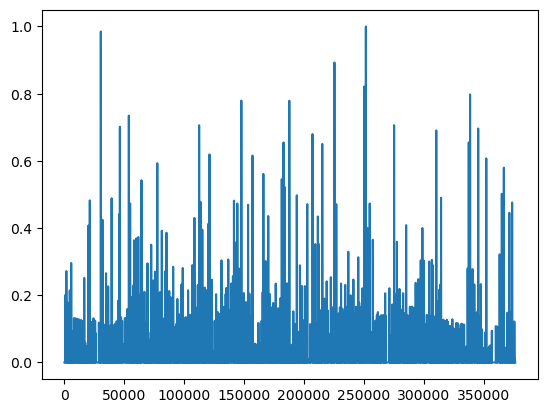

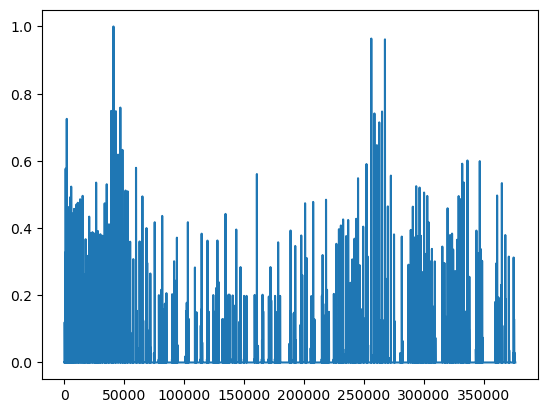

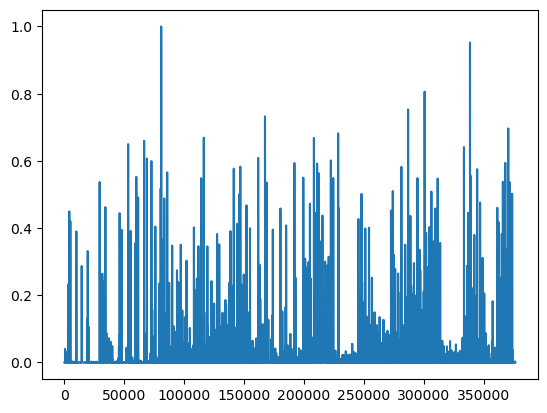

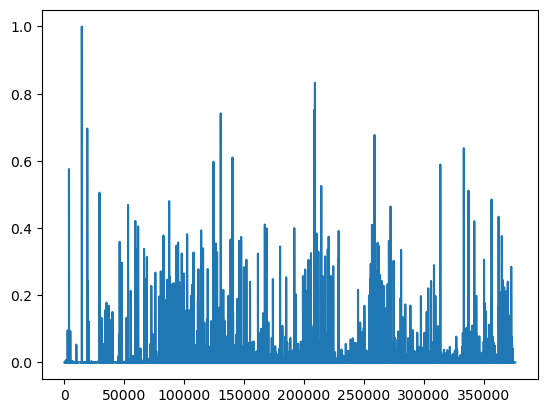

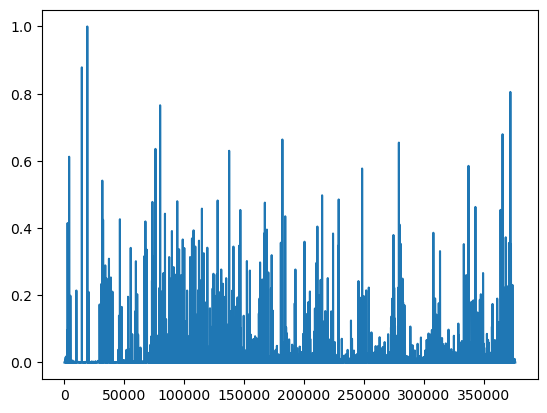

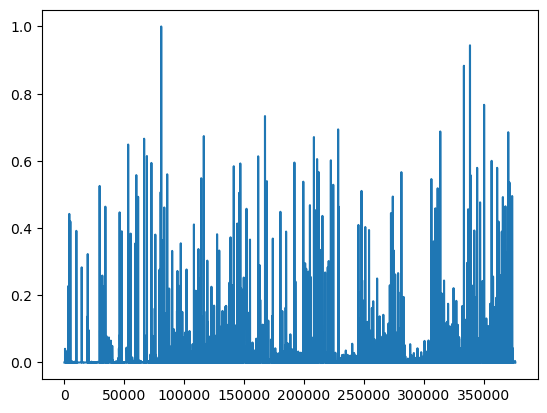

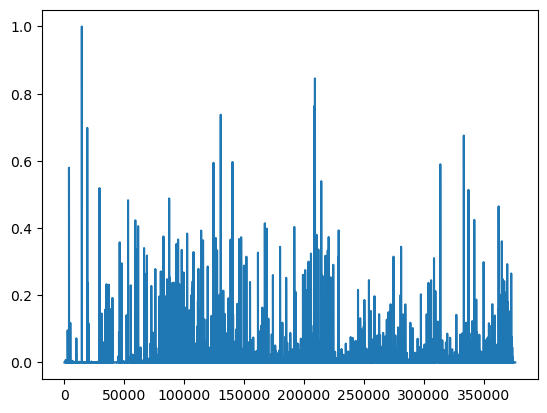

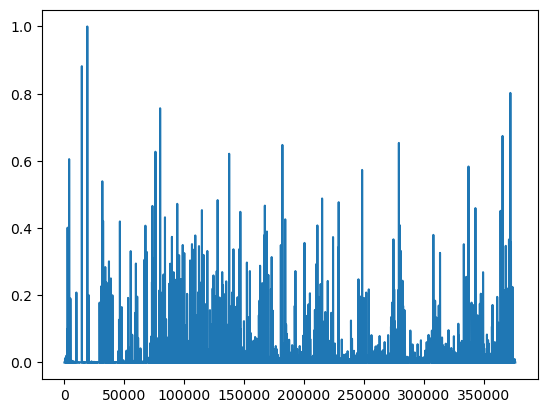

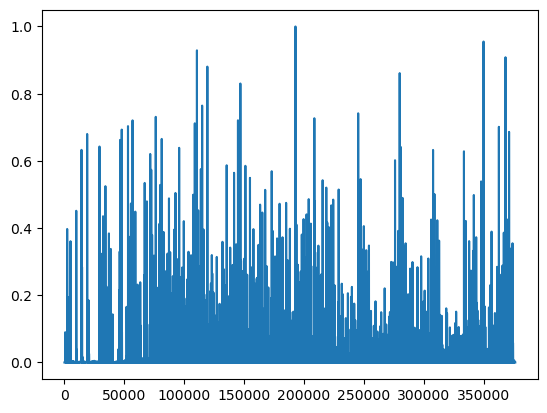

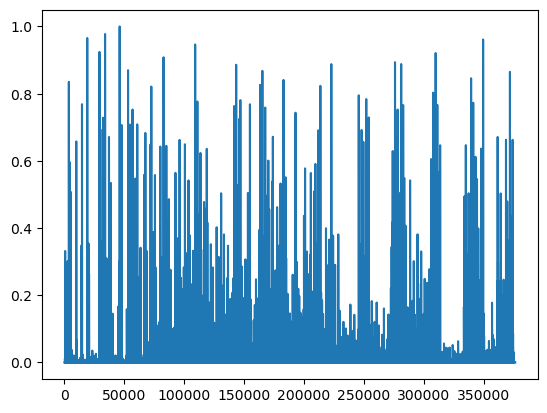

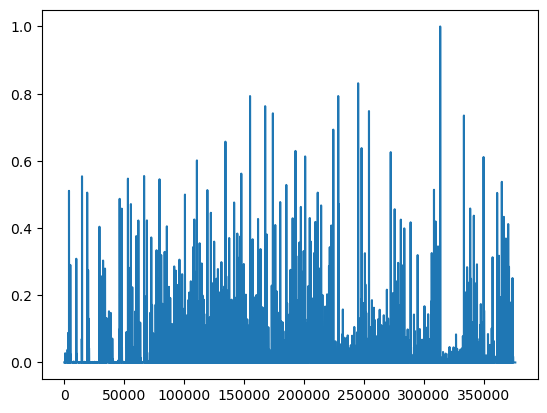

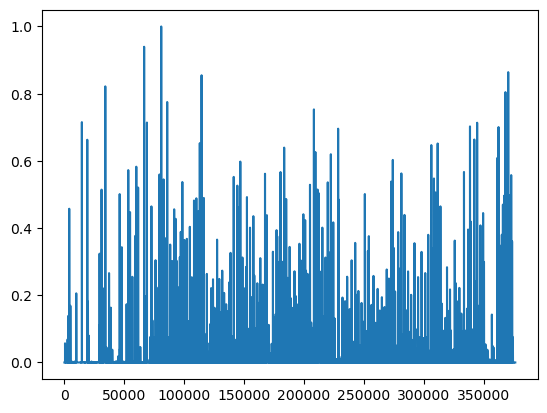

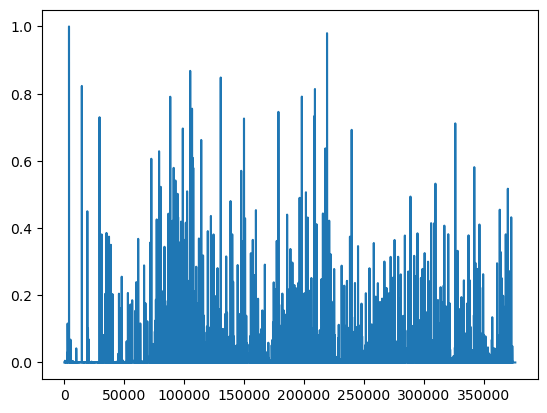

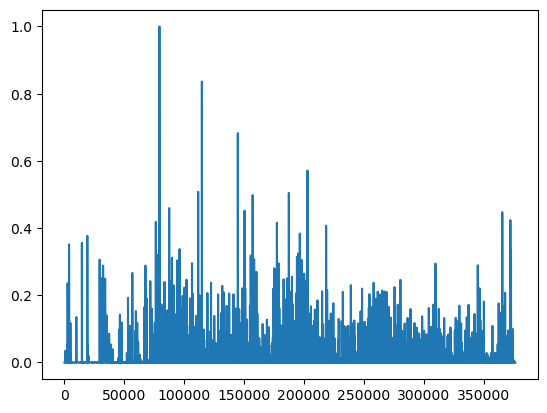

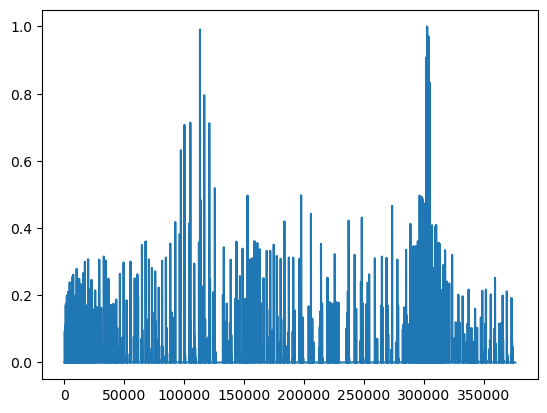

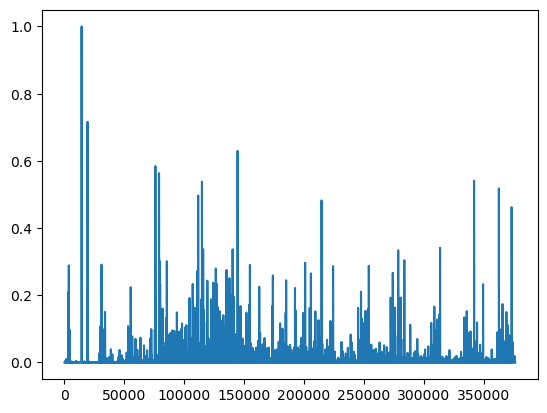

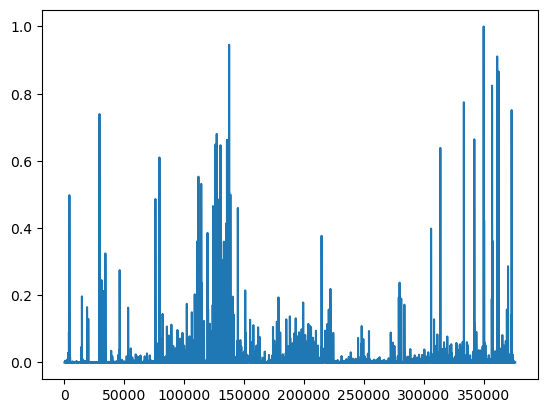

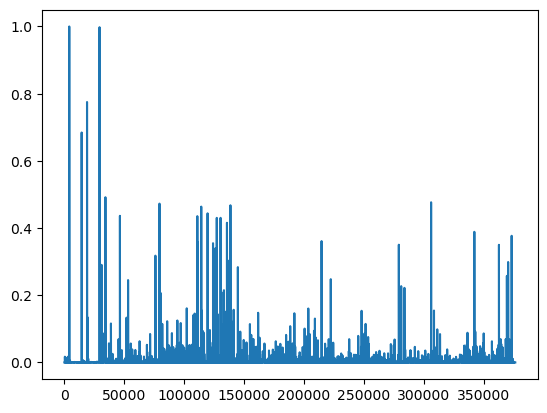

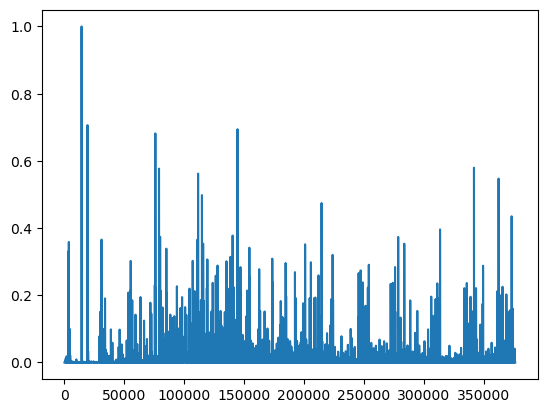

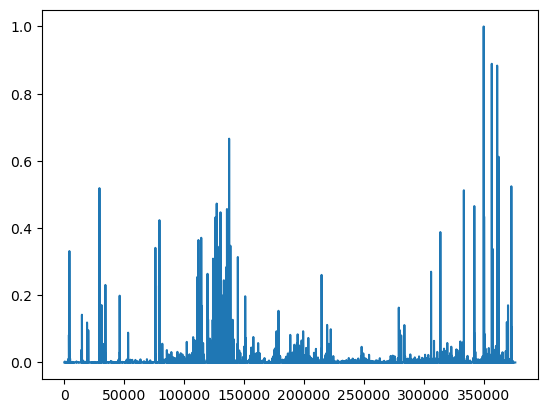

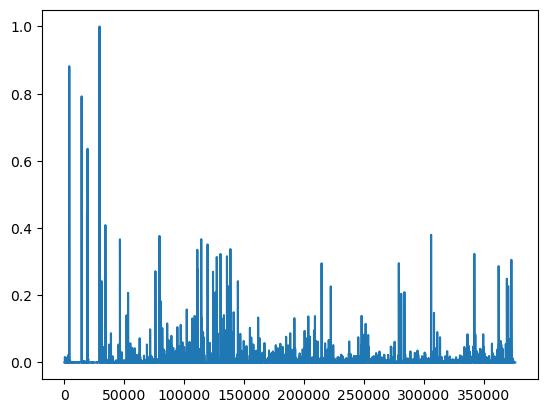

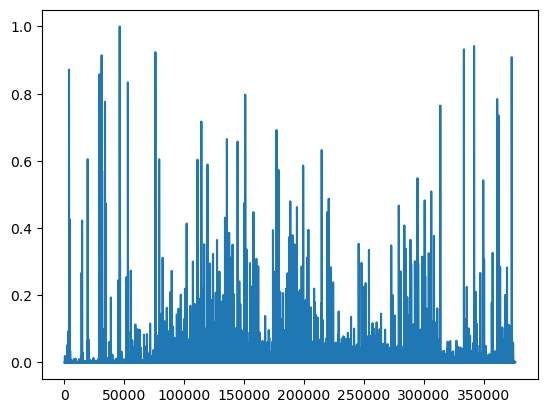

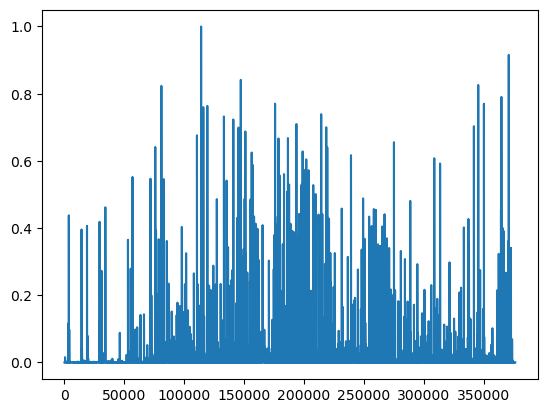

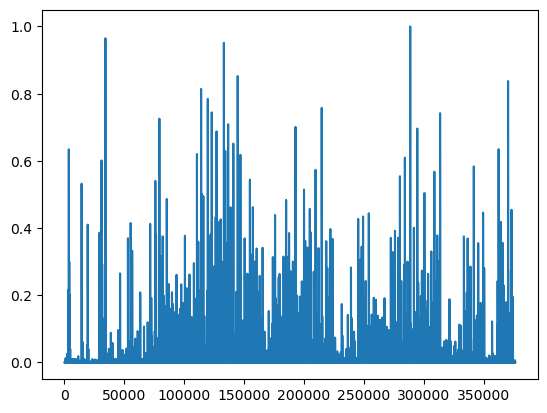

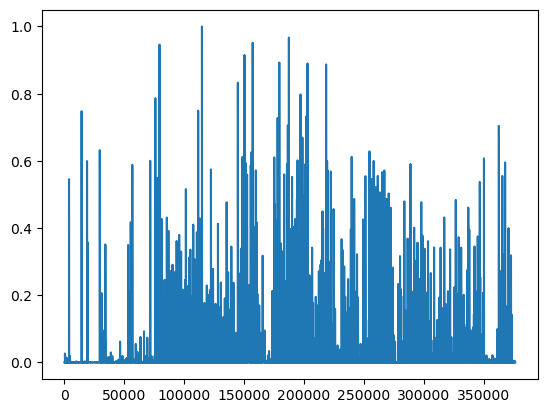

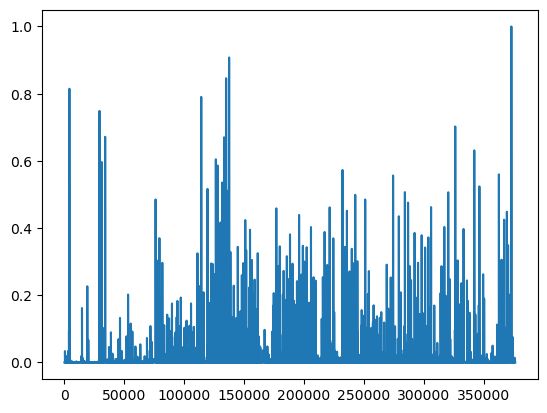

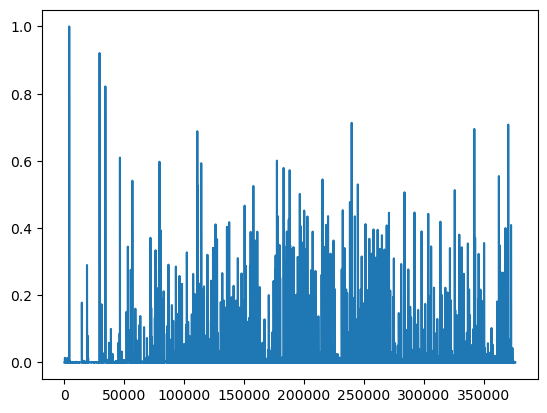

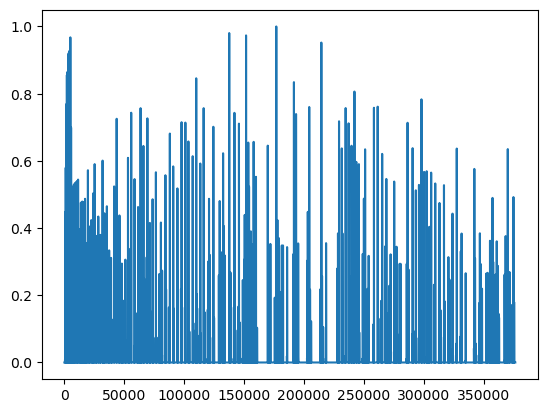

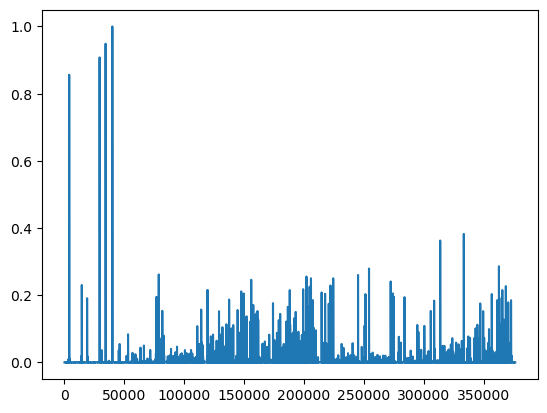

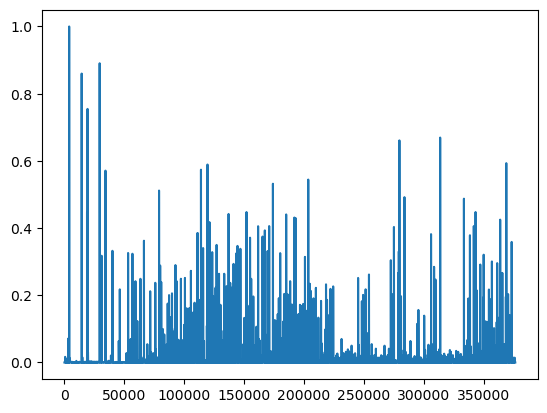

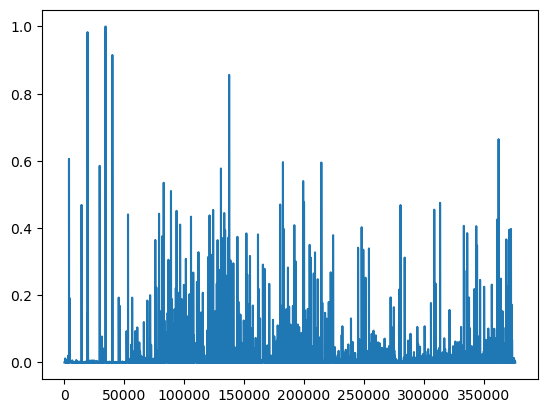

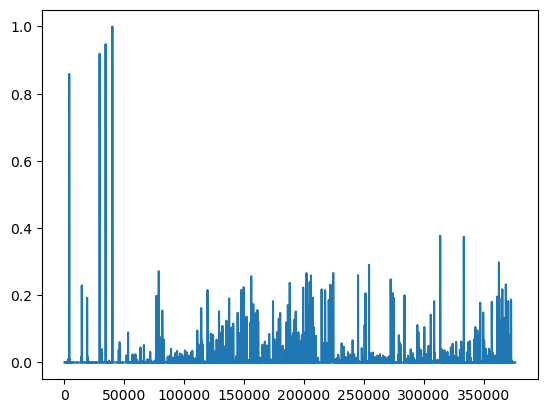

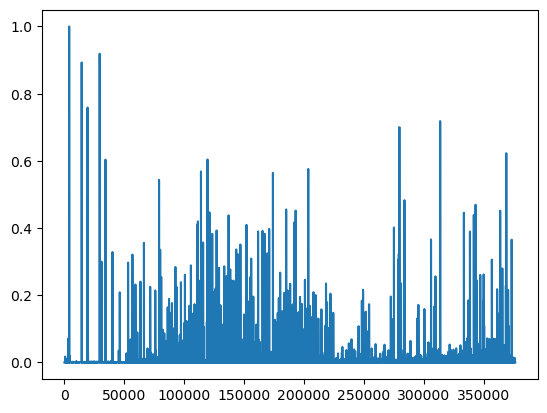

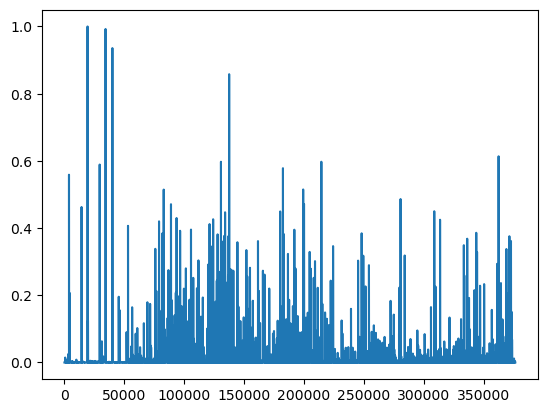

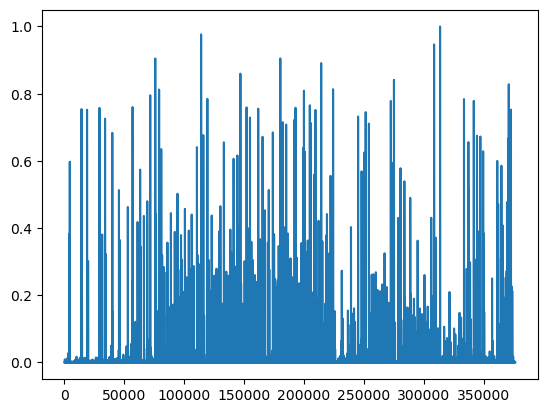

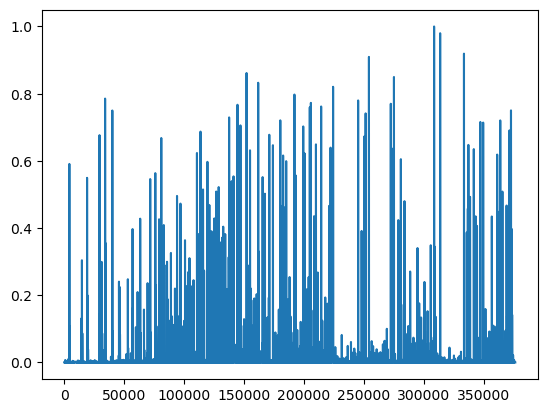

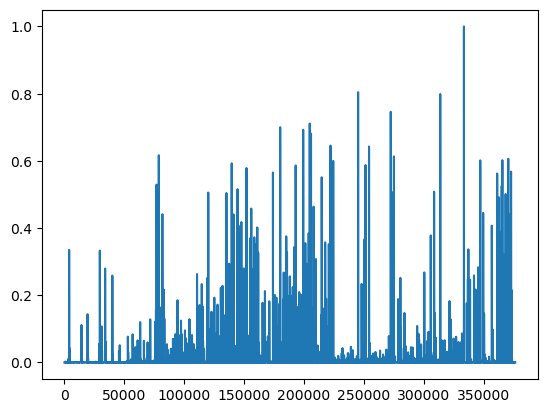

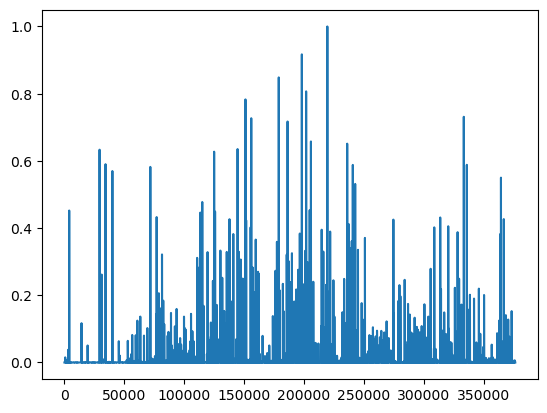

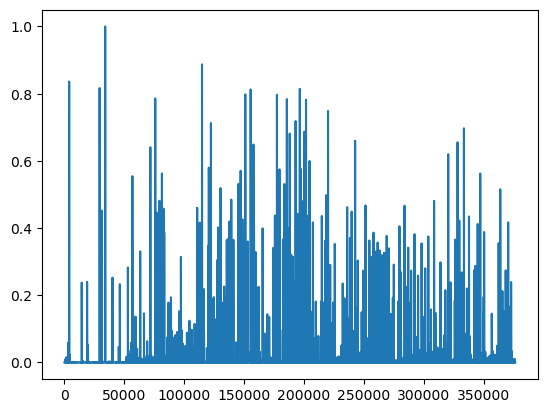

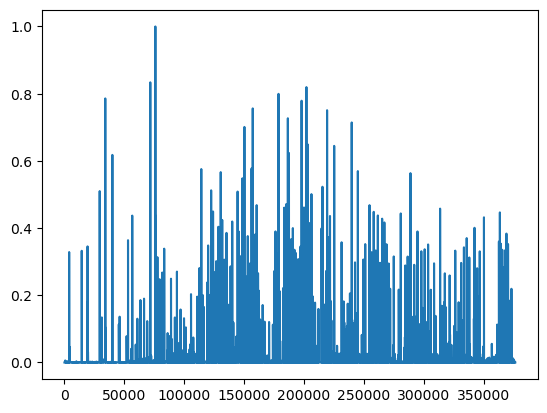

In [107]:
for cp in change_points:
    plt.plot(cp)
    plt.show()

## Set parameters

In [93]:
window_size = 150
domain = "both" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

## Generate data

In [94]:
#timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

# plt.figure(figsize=(15,4))
# plt.plot(timeseries)
# plt.show()
# plt.figure(figsize=(15,4))
# plt.plot(range(4000,4500),timeseries[4000:4500])
# plt.show()

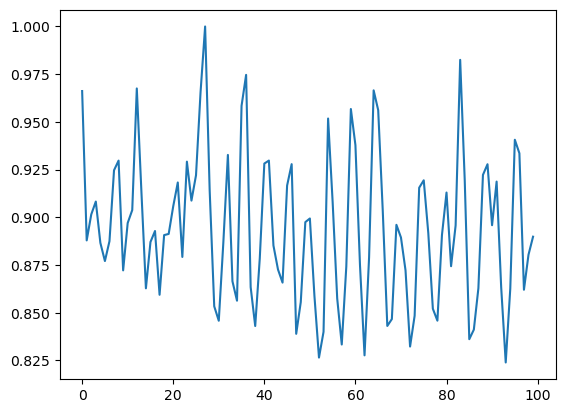

In [67]:
plt.plot(windows_TD[-1])

In [64]:
len(parameters)

4906

In [48]:
len(windows_TD)

4807

In [49]:
len(timeseries)

4906

In [50]:
len(windows_TD)

4807

## Train the autoencoders

In [95]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

Model: "model_30"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 3, 50)]      0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 3, 1)         51          ['input_21[0][0]']               
                                                                                                  
 dense_41 (Dense)               (None, 3, 0)         0           ['input_21[0][0]']               
                                                                                                  
 tf.concat_10 (TFOpLambda)      (None, 3, 1)         0           ['dense_40[0][0]',               
                                                                  'dense_41[0][0]']        

5881/5881 [==============================] - 4s 651us/step - loss: 0.0023
Epoch 77/200
5881/5881 [==============================] - 4s 636us/step - loss: 0.0023
Epoch 78/200
5881/5881 [==============================] - 4s 649us/step - loss: 0.0023
Epoch 79/200
5881/5881 [==============================] - 4s 640us/step - loss: 0.0023
Epoch 80/200
5881/5881 [==============================] - 4s 634us/step - loss: 0.0023
Epoch 81/200
5881/5881 [==============================] - 4s 616us/step - loss: 0.0023
Epoch 82/200
5881/5881 [==============================] - 4s 624us/step - loss: 0.0023
Epoch 83/200
5881/5881 [==============================] - 4s 613us/step - loss: 0.0023
Epoch 84/200
5881/5881 [==============================] - 4s 619us/step - loss: 0.0023
Epoch 85/200
5881/5881 [==============================] - 4s 606us/step - loss: 0.0023
Epoch 86/200
5881/5881 [==============================] - 4s 621us/step - loss: 0.0023
Epoch 87/200
5881/5881 [==============================] 

5881/5881 [==============================] - 4s 635us/step - loss: 5.9455e-05
Epoch 38/200
5881/5881 [==============================] - 4s 640us/step - loss: 5.9331e-05
Epoch 39/200
5881/5881 [==============================] - 4s 633us/step - loss: 5.8995e-05
Epoch 40/200
5881/5881 [==============================] - 4s 635us/step - loss: 5.9016e-05
Epoch 41/200
5881/5881 [==============================] - 4s 656us/step - loss: 5.9055e-05
Epoch 42/200
5881/5881 [==============================] - 4s 668us/step - loss: 5.8788e-05
Epoch 43/200
5881/5881 [==============================] - 4s 642us/step - loss: 5.8652e-05
Epoch 44/200
5881/5881 [==============================] - 4s 689us/step - loss: 5.1791e-05
Epoch 45/200
5881/5881 [==============================] - 4s 629us/step - loss: 4.2821e-05
Epoch 46/200
5881/5881 [==============================] - 4s 620us/step - loss: 3.9710e-05
Epoch 47/200
5881/5881 [==============================] - 4s 631us/step - loss: 3.7101e-05
Epoch 48/200

## Postprocessing and peak detection

In [96]:
#we calculate the smoothened dissimilarity measure and the corresponding prominence-based change point scores
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

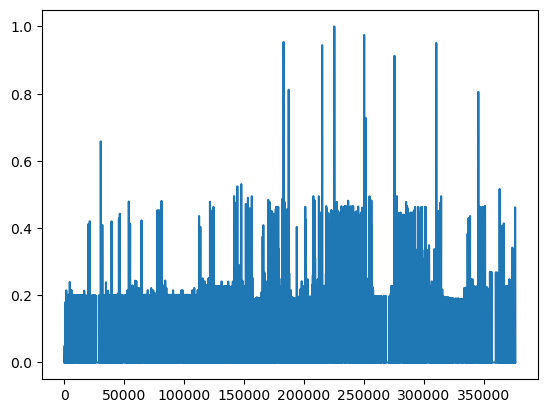

In [97]:
plt.plot(change_point_scores)

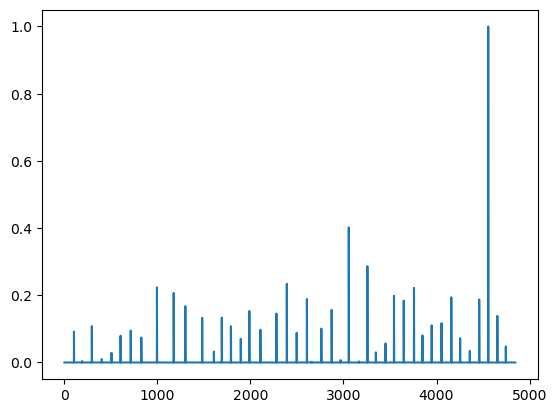

In [29]:
plt.plot(change_point_scores)

In [9]:
len(change_point_scores)

4891

In [13]:
for cp in change_point_scores:
    print(cp)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06434489186439922
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.09483356732474237
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0011681170589762438
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06533686753904083
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0002952076565381951
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


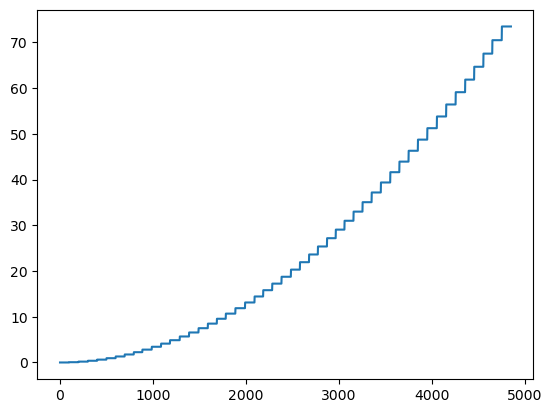

In [30]:
plt.plot(parameters)

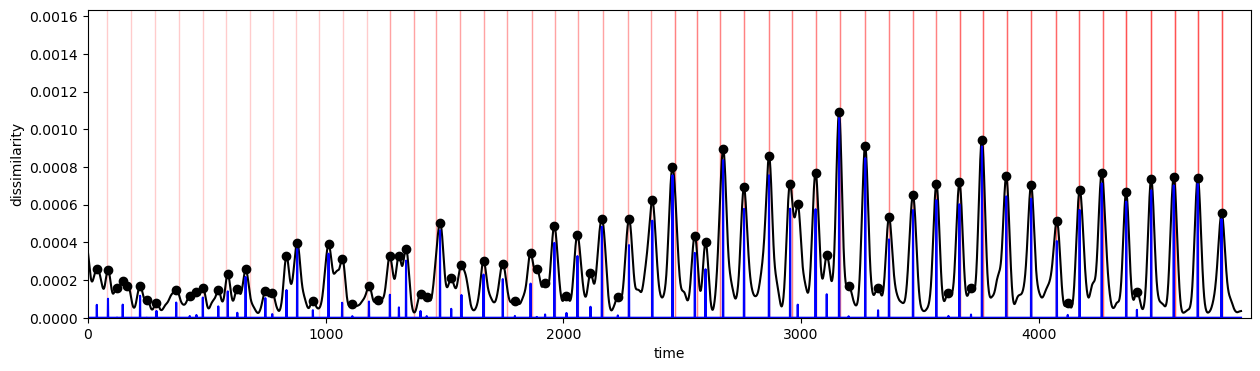

[0.550891906353687, 0.8743445310388827, 0.9183974317101846]


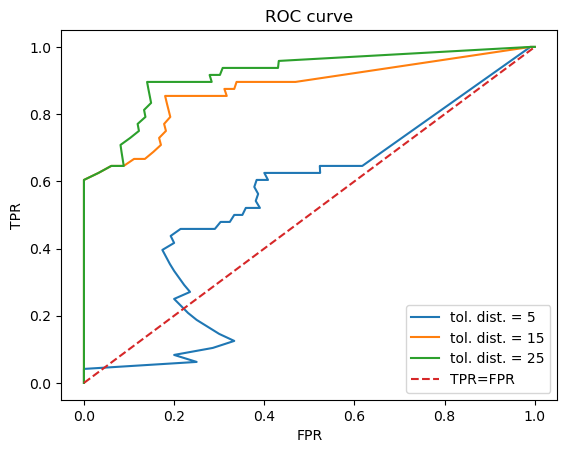

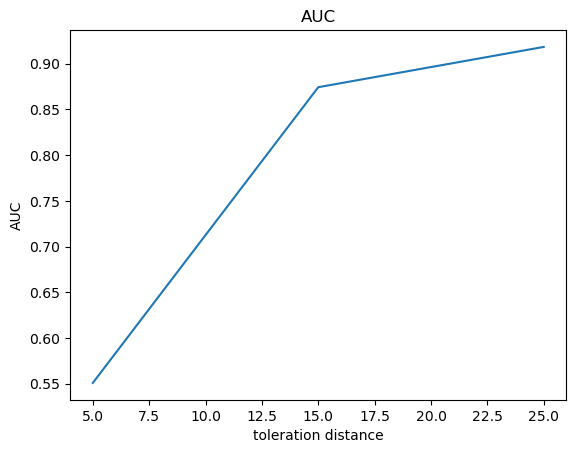

In [15]:
#parameters for plot
time_start = 0
time_stop = len(timeseries)
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)